# MELBOURNE HOUSING MARKET ANALYSIS
## Introduction
This project aims to analyse the Melbourne housing market, especially 2 or more bedrooms market with the price range from $600,000 to $2,000,000. Data was scraped from Domain.com.au up to 17/08/2024. We will try to answer some questions like is Melbourne market cooling down the past year? How were some suburbs perform compared to others? What are some undervalued and overvalued suburbs? Seasons of the year attract more buyers?

First, let's import some basic libraries used for processing data and visualisation.


In [ ]:
# @title Default title text
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
from plotly import tools

In [ ]:
# @title Default title text
!pip install -U kaleido

In [ ]:
# @title Default title text
import kaleido

In [ ]:
# @title Default title text
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# @title Default title text
pd.set_option('display.float_format', '{:,.2f}'.format)

I. Data exploration
Read the dataset and inspect its appearance.

In [ ]:
# @title Default title text
mel_prices = pd.read_csv('/content/drive/My Drive/Python/all_listings_final.csv')
mel_prices.head(10)

,Price,Suburb,Property Size,Property Type,Street,Beds,Baths,Date Sold,Latitude,Longitude,Sale Method,Sold Action,Days Listed,Primary Property Type,Date Listed,Land Area
0,"$645,000",KINGS PARK,538 m²,House,23 Gum Road,3,2.0,NaN,-37.739520,144.77538,privateTreaty,privateTreaty,48.0,House,2024-07-03T10:36:46.000,538.0
1,"$650,000",ARMSTRONG CREEK,370 m²,House,13 Stingray Street,4,2.0,NaN,-38.225506,144.37233,privateTreaty,privateTreaty,43.0,House,2024-07-08T12:48:49.000,370.0
2,"$620,000",BELL PARK,612 m²,House,5 Devlin Court,3,1.0,NaN,-38.105427,144.33783,privateTreaty,privateTreaty,32.0,House,2024-07-19T13:09:10.000,612.0
3,"$600,000",CLYDE NORTH,238 m²,House,13 Timble Way,3,2.0,NaN,-38.103363,145.32181,privateTreaty,privateTreaty,42.0,House,2024-07-09T14:40:02.000,238.0
4,"$650,000",DOCKLANDS,0 m²,ApartmentUnitFlat,1601E/888 Collins Street,2,2.0,NaN,-37.820583,144.94252,privateTreaty,privateTreaty,77.0,Apartment,2024-06-03T17:21:54.000,NaN
5,"$615,000",KURUNJANG,710 m²,House,5 Melrome Court,4,2.0,NaN,-37.663200,144.59163,privateTreaty,privateTreaty,34.0,House,2024-07-17T13:50:26.000,710.0
6,"$606,000",LAVERTON,625 m²,House,7 Snowden Street,3,1.0,NaN,-37.854748,144.77370,privateTreaty,privateTreaty,29.0,House,2024-07-22T14:17:16.000,625.0
7,"$605,000",MAMBOURIN,400 m²,House,13 Nuttall Street,4,2.0,NaN,-37.888107,144.59637,privateTreaty,privateTreaty,42.0,House,2024-07-09T11:30:15.000,400.0
8,"$620,000",PASCOE VALE,173 m²,ApartmentUnitFlat,3/77 Northumberland Road,2,1.0,2024-08-17T10:30:00,-37.723038,144.93169,auction,auction,33.0,Apartment,2024-07-18T14:13:06.000,173.0
9,"$600,000",ROXBURGH PARK,210 m²,House,40 Arena Avenue,3,2.0,2024-08-17T13:30:00,-37.621098,144.91699,auction,auction,19.0,House,2024-08-01T10:59:07.000,210.0


As we can see from the table, it looks like that some columns are showing the same value. Let's examine to see if values are alike.

In [ ]:
# @title Default title text
unique_values = mel_prices["Property Type"].unique()
unique_values_a = mel_prices["Primary Property Type"].unique()
print(unique_values)
print(unique_values_a)

['House' 'ApartmentUnitFlat' 'Townhouse' 'Villa' 'SemiDetached'
 'NewHouseLand' 'BlockOfUnits' 'NewApartments' 'Terrace' 'Duplex']
['House' 'Apartment' 'Townhouse/Villa' 'Any'
 'Townhouse/Villa,New Developments' 'New Developments'
 'New Developments,Apartment' 'Any,House' 'House,Land' nan
 'Townhouse/Villa,House' 'Apartment,Townhouse/Villa'
 'House,Townhouse/Villa' 'Apartment,House,Townhouse/Villa'
 'Apartment,House,Townhouse/Villa,Townhouse/Villa' 'Apartment,House'
 'House,House' 'New Developments,Townhouse/Villa' 'House,Any'
 'Apartment,Townhouse/Villa,Townhouse/Villa']


It seems like property type attributes are more detail-oriented than primary property type. So we will drop primary property type column. Property size is showing the same value as land area so it will be dropped as well. Days list is not relevant as it shows the date is on the listing site from the scarping day.

In [ ]:
# @title Default title text
mel_prices.drop(columns=['Property Size','Days Listed','Primary Property Type'], inplace=True)
mel_prices.head(10)

,Price,Suburb,Property Type,Street,Beds,Baths,Date Sold,Latitude,Longitude,Sale Method,Sold Action,Date Listed,Land Area
0,"$645,000",KINGS PARK,House,23 Gum Road,3,2.0,NaN,-37.739520,144.77538,privateTreaty,privateTreaty,2024-07-03T10:36:46.000,538.0
1,"$650,000",ARMSTRONG CREEK,House,13 Stingray Street,4,2.0,NaN,-38.225506,144.37233,privateTreaty,privateTreaty,2024-07-08T12:48:49.000,370.0
2,"$620,000",BELL PARK,House,5 Devlin Court,3,1.0,NaN,-38.105427,144.33783,privateTreaty,privateTreaty,2024-07-19T13:09:10.000,612.0
3,"$600,000",CLYDE NORTH,House,13 Timble Way,3,2.0,NaN,-38.103363,145.32181,privateTreaty,privateTreaty,2024-07-09T14:40:02.000,238.0
4,"$650,000",DOCKLANDS,ApartmentUnitFlat,1601E/888 Collins Street,2,2.0,NaN,-37.820583,144.94252,privateTreaty,privateTreaty,2024-06-03T17:21:54.000,NaN
5,"$615,000",KURUNJANG,House,5 Melrome Court,4,2.0,NaN,-37.663200,144.59163,privateTreaty,privateTreaty,2024-07-17T13:50:26.000,710.0
6,"$606,000",LAVERTON,House,7 Snowden Street,3,1.0,NaN,-37.854748,144.77370,privateTreaty,privateTreaty,2024-07-22T14:17:16.000,625.0
7,"$605,000",MAMBOURIN,House,13 Nuttall Street,4,2.0,NaN,-37.888107,144.59637,privateTreaty,privateTreaty,2024-07-09T11:30:15.000,400.0
8,"$620,000",PASCOE VALE,ApartmentUnitFlat,3/77 Northumberland Road,2,1.0,2024-08-17T10:30:00,-37.723038,144.93169,auction,auction,2024-07-18T14:13:06.000,173.0
9,"$600,000",ROXBURGH PARK,House,40 Arena Avenue,3,2.0,2024-08-17T13:30:00,-37.621098,144.91699,auction,auction,2024-08-01T10:59:07.000,210.0


Let's check how many columns we have and the data type of these columns

In [ ]:
# @title Default title text
mel_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153109 entries, 0 to 153108
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Price          153109 non-null  object 
 1   Suburb         153100 non-null  object 
 2   Property Type  153109 non-null  object 
 3   Street         152897 non-null  object 
 4   Beds           153109 non-null  int64  
 5   Baths          153100 non-null  float64
 6   Date Sold      26781 non-null   object 
 7   Latitude       153094 non-null  float64
 8   Longitude      153094 non-null  float64
 9   Sale Method    153089 non-null  object 
 10  Sold Action    153089 non-null  object 
 11  Date Listed    153089 non-null  object 
 12  Land Area      94370 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 15.2+ MB


We have another table with details of the suburb and their respective information. We will now combine these two tables.

In [ ]:
# @title Default title text
mel_region = pd.read_csv('/content/drive/My Drive/Python/melregion.csv')
mel_region.head(10)

,Suburb,Postcode,Regionname,Distance,CouncilArea
0,Abbotsford,3067,Northern Metropolitan,3.0,Yarra City Council
1,Abbotsford,3067,Northern Metropolitan,3.0,Yarra City Council
2,Abbotsford,3067,Northern Metropolitan,3.0,Yarra City Council
3,Aberfeldie,3040,Western Metropolitan,7.5,Moonee Valley City Council
4,Airport West,3042,Western Metropolitan,10.4,Moonee Valley City Council
5,Airport West,3042,Western Metropolitan,10.4,Moonee Valley City Council
6,Airport West,3042,Western Metropolitan,10.4,Moonee Valley City Council
7,Airport West,3042,Western Metropolitan,10.4,Moonee Valley City Council
8,Albanvale,3021,Western Metropolitan,14.0,Brimbank City Council
9,Albert Park,3206,Southern Metropolitan,3.0,Port Phillip City Council


In [ ]:
# @title Default title text
# Convert suburb names to uppercase in mel_reions DataFrames
mel_region['Suburb'] = mel_region['Suburb'].str.upper()
# Merging 2 tables
merged_df = pd.merge(mel_prices, mel_region, on='Suburb', how='left')
merged_df.head(10)

,Price,Suburb,Property Type,Street,Beds,Baths,Date Sold,Latitude,Longitude,Sale Method,Sold Action,Date Listed,Land Area,Postcode,Regionname,Distance,CouncilArea
0,"$645,000",KINGS PARK,House,23 Gum Road,3,2.0,NaN,-37.73952,144.77538,privateTreaty,privateTreaty,2024-07-03T10:36:46.000,538.0,3021.0,Western Metropolitan,14.0,Brimbank City Council
1,"$645,000",KINGS PARK,House,23 Gum Road,3,2.0,NaN,-37.73952,144.77538,privateTreaty,privateTreaty,2024-07-03T10:36:46.000,538.0,3021.0,Western Metropolitan,14.0,Brimbank City Council
2,"$645,000",KINGS PARK,House,23 Gum Road,3,2.0,NaN,-37.73952,144.77538,privateTreaty,privateTreaty,2024-07-03T10:36:46.000,538.0,3021.0,Western Metropolitan,14.0,Brimbank City Council
3,"$645,000",KINGS PARK,House,23 Gum Road,3,2.0,NaN,-37.73952,144.77538,privateTreaty,privateTreaty,2024-07-03T10:36:46.000,538.0,3021.0,Western Metropolitan,14.0,Brimbank City Council
4,"$645,000",KINGS PARK,House,23 Gum Road,3,2.0,NaN,-37.73952,144.77538,privateTreaty,privateTreaty,2024-07-03T10:36:46.000,538.0,3021.0,Western Metropolitan,14.0,Brimbank City Council
5,"$645,000",KINGS PARK,House,23 Gum Road,3,2.0,NaN,-37.73952,144.77538,privateTreaty,privateTreaty,2024-07-03T10:36:46.000,538.0,3021.0,Western Metropolitan,14.0,Brimbank City Council
6,"$645,000",KINGS PARK,House,23 Gum Road,3,2.0,NaN,-37.73952,144.77538,privateTreaty,privateTreaty,2024-07-03T10:36:46.000,538.0,3021.0,Western Metropolitan,14.0,Brimbank City Council
7,"$645,000",KINGS PARK,House,23 Gum Road,3,2.0,NaN,-37.73952,144.77538,privateTreaty,privateTreaty,2024-07-03T10:36:46.000,538.0,3021.0,Western Metropolitan,14.0,Brimbank City Council
8,"$645,000",KINGS PARK,House,23 Gum Road,3,2.0,NaN,-37.73952,144.77538,privateTreaty,privateTreaty,2024-07-03T10:36:46.000,538.0,3021.0,Western Metropolitan,14.0,Brimbank City Council
9,"$645,000",KINGS PARK,House,23 Gum Road,3,2.0,NaN,-37.73952,144.77538,privateTreaty,privateTreaty,2024-07-03T10:36:46.000,538.0,3021.0,Western Metropolitan,14.0,Brimbank City Council


In [ ]:
# @title Default title text
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36697976 entries, 0 to 36697975
Data columns (total 17 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Price          object 
 1   Suburb         object 
 2   Property Type  object 
 3   Street         object 
 4   Beds           int64  
 5   Baths          float64
 6   Date Sold      object 
 7   Latitude       float64
 8   Longitude      float64
 9   Sale Method    object 
 10  Sold Action    object 
 11  Date Listed    object 
 12  Land Area      float64
 13  Postcode       float64
 14  Regionname     object 
 15  Distance       float64
 16  CouncilArea    object 
dtypes: float64(6), int64(1), object(10)
memory usage: 4.6+ GB


The merging was adding a lot more data to the table. We will now need to check for duplicates value. As this was scarped through some same filtering as well, therefore there will definitely some duplicate values in this dataset. As the house can be sold multiple time during our timeframe, so we will check the house address together with the day listed to make sure we are not removing unique data.

In [ ]:
# @title Default title text
# Check for duplicates based on 'Street' and 'Date Listed' columns
duplicate_count = merged_df.duplicated(subset=['Street', 'Date Listed']).sum()
duplicate_count

36589527

In [ ]:
# @title Default title text
# Find duplicate rows based on 'Street' and 'Date Listed'
duplicates = merged_df[merged_df.duplicated(subset=['Street', 'Date Listed'], keep=False)]

# Display the rows with duplicates
print(duplicates)

               Price      Suburb Property Type              Street  Beds  \
0           $645,000  KINGS PARK         House         23 Gum Road     3   
1           $645,000  KINGS PARK         House         23 Gum Road     3   
2           $645,000  KINGS PARK         House         23 Gum Road     3   
3           $645,000  KINGS PARK         House         23 Gum Road     3   
4           $645,000  KINGS PARK         House         23 Gum Road     3   
...              ...         ...           ...                 ...   ...   
36697971  $1,350,000    ESSENDON     Townhouse  188 Buckley Street     4   
36697972  $1,350,000    ESSENDON     Townhouse  188 Buckley Street     4   
36697973  $1,350,000    ESSENDON     Townhouse  188 Buckley Street     4   
36697974  $1,350,000    ESSENDON     Townhouse  188 Buckley Street     4   
36697975  $1,350,000    ESSENDON     Townhouse  188 Buckley Street     4   

          Baths            Date Sold   Latitude  Longitude    Sale Method  \
0         

In [ ]:
# @title Default title text
# Remove duplicate rows based on 'Street' and 'Date Listed', keeping the first occurrence
cleaned_df = merged_df.drop_duplicates(subset=['Street', 'Date Listed'], keep='first')
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108449 entries, 0 to 36697408
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Price          108449 non-null  object 
 1   Suburb         108442 non-null  object 
 2   Property Type  108449 non-null  object 
 3   Street         108297 non-null  object 
 4   Beds           108449 non-null  int64  
 5   Baths          108442 non-null  float64
 6   Date Sold      19527 non-null   object 
 7   Latitude       108436 non-null  float64
 8   Longitude      108436 non-null  float64
 9   Sale Method    108429 non-null  object 
 10  Sold Action    108429 non-null  object 
 11  Date Listed    108429 non-null  object 
 12  Land Area      66151 non-null   float64
 13  Postcode       88882 non-null   float64
 14  Regionname     88882 non-null   object 
 15  Distance       88882 non-null   float64
 16  CouncilArea    88882 non-null   object 
dtypes: float64(6), int64(1), object(

In [ ]:
# @title Default title text
cleaned_df[['Street', 'Date Listed']].duplicated().sum()

0

We create 2 variable called categorical and numberical to inspect these attributes.

In [ ]:
# @title Default title text
# Remove dollar signs and commas, and convert 'Price' to numeric
cleaned_df['Price'] = cleaned_df['Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Display the cleaned DataFrame
print(cleaned_df)

                Price           Suburb      Property Type  \
0          645,000.00       KINGS PARK              House   
80         650,000.00  ARMSTRONG CREEK              House   
81         620,000.00        BELL PARK              House   
82         600,000.00      CLYDE NORTH              House   
88         650,000.00        DOCKLANDS  ApartmentUnitFlat   
...               ...              ...                ...   
36696184 1,310,000.00          LEOPOLD              House   
36696185 1,330,000.00        SPOTSWOOD              House   
36696261 1,314,000.00    GLEN WAVERLEY          Townhouse   
36697080 1,350,000.00          BURWOOD              House   
36697408 1,350,000.00         ESSENDON          Townhouse   

                            Street  Beds  Baths           Date Sold  Latitude  \
0                      23 Gum Road     3   2.00                 NaT    -37.74   
80              13 Stingray Street     4   2.00                 NaT    -38.23   
81                  5 De

<ipython-input-49-357bb5cc0fe2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Price'] = cleaned_df['Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)


In [ ]:
# @title Default title text
# Save the file for analysis later
cleaned_df.to_csv('/content/drive/My Drive/Python/cleaned_data.csv', index=False)

In [ ]:
# @title Default title text
cleaned_df = pd.read_csv('/content/drive/My Drive/Python/cleaned_data.csv')
cleaned_df.head(10)

,Price,Suburb,Property Type,Street,Beds,Baths,Date Sold,Latitude,Longitude,Sale Method,...,Land Area,Postcode,Regionname,Distance,CouncilArea,Month Listed,Year Listed,Days on Market,Month Sold,Year Sold
0,645000.0,KINGS PARK,House,23 Gum Road,3,2.0,NaN,-37.739520,144.77538,privateTreaty,...,538.0,3021.0,Western Metropolitan,14.0,Brimbank City Council,7.0,2024.0,NaN,NaN,NaN
1,650000.0,ARMSTRONG CREEK,House,13 Stingray Street,4,2.0,NaN,-38.225506,144.37233,privateTreaty,...,370.0,NaN,NaN,NaN,NaN,7.0,2024.0,NaN,NaN,NaN
2,620000.0,BELL PARK,House,5 Devlin Court,3,1.0,NaN,-38.105427,144.33783,privateTreaty,...,612.0,NaN,NaN,NaN,NaN,7.0,2024.0,NaN,NaN,NaN
3,600000.0,CLYDE NORTH,House,13 Timble Way,3,2.0,NaN,-38.103363,145.32181,privateTreaty,...,238.0,3978.0,Eastern Victoria,43.4,Casey City Council,7.0,2024.0,NaN,NaN,NaN
4,650000.0,DOCKLANDS,ApartmentUnitFlat,1601E/888 Collins Street,2,2.0,NaN,-37.820583,144.94252,privateTreaty,...,NaN,3008.0,Southern Metropolitan,1.4,Melbourne City Council,6.0,2024.0,NaN,NaN,NaN
5,615000.0,KURUNJANG,House,5 Melrome Court,4,2.0,NaN,-37.663200,144.59163,privateTreaty,...,710.0,3337.0,Northern Victoria,31.7,Melton City Council,7.0,2024.0,NaN,NaN,NaN
6,606000.0,LAVERTON,House,7 Snowden Street,3,1.0,NaN,-37.854748,144.77370,privateTreaty,...,625.0,3028.0,Western Metropolitan,15.5,Hobsons Bay City Council,7.0,2024.0,NaN,NaN,NaN
7,605000.0,MAMBOURIN,House,13 Nuttall Street,4,2.0,NaN,-37.888107,144.59637,privateTreaty,...,400.0,NaN,NaN,NaN,NaN,7.0,2024.0,NaN,NaN,NaN
8,620000.0,PASCOE VALE,ApartmentUnitFlat,3/77 Northumberland Road,2,1.0,2024-08-17 10:30:00,-37.723038,144.93169,auction,...,173.0,3044.0,Northern Metropolitan,8.5,Moreland City Council,7.0,2024.0,29.0,8.0,2024.0
9,600000.0,ROXBURGH PARK,House,40 Arena Avenue,3,2.0,2024-08-17 13:30:00,-37.621098,144.91699,auction,...,210.0,3064.0,Northern Metropolitan,20.6,Hume City Council,8.0,2024.0,16.0,8.0,2024.0


In [ ]:
# @title Default title text
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108449 entries, 0 to 108448
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Price           108449 non-null  float64
 1   Suburb          108442 non-null  object 
 2   Property Type   108449 non-null  object 
 3   Street          108297 non-null  object 
 4   Beds            108449 non-null  int64  
 5   Baths           108442 non-null  float64
 6   Date Sold       19527 non-null   object 
 7   Latitude        108436 non-null  float64
 8   Longitude       108436 non-null  float64
 9   Sale Method     108429 non-null  object 
 10  Sold Action     108429 non-null  object 
 11  Date Listed     108429 non-null  object 
 12  Land Area       66151 non-null   float64
 13  Postcode        88882 non-null   float64
 14  Regionname      88882 non-null   object 
 15  Distance        88882 non-null   float64
 16  CouncilArea     88882 non-null   object 
 17  Month List

In [ ]:
# @title Default title text
# List of categorical variables
categorical = [i for i in cleaned_df.columns if cleaned_df[i].dtypes == 'O']
# List of numerical variables
numerical = [i for i in cleaned_df.columns if i not in categorical]
print('categorical:', categorical, '\n', 'numerical: ', numerical)

categorical: ['Suburb', 'Property Type', 'Street', 'Date Sold', 'Sale Method', 'Sold Action', 'Date Listed', 'Regionname', 'CouncilArea'] 
 numerical:  ['Price', 'Beds', 'Baths', 'Latitude', 'Longitude', 'Land Area', 'Postcode', 'Distance', 'Month Listed', 'Year Listed', 'Days on Market', 'Month Sold', 'Year Sold']


Let's check null values in these columns

In [ ]:
# @title Default title text
cleaned_df[numerical].isnull().sum()

,0
Beds,0
Baths,7
Latitude,13
Longitude,13
Land Area,42298
Postcode,19567
Distance,19567


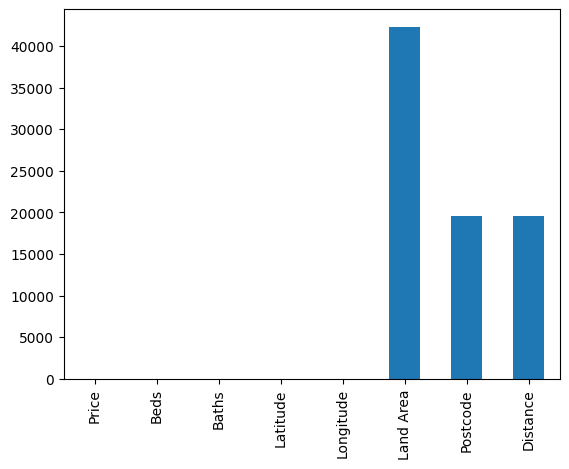

In [ ]:
# @title Default title text
cleaned_df[numerical].isnull().sum().plot.bar()
plt.show()

In [ ]:
# @title Default title text
round(cleaned_df[numerical].isnull().sum()/len(cleaned_df)*100,3)

,0
Beds,0.000
Baths,0.006
Latitude,0.012
Longitude,0.012
Land Area,39.003
Postcode,18.043
Distance,18.043


As we can see, Land area is missing nearly 40% data while Postcode and Distance is sitting at under 20%. The rest of the attributes seem greatly sufficent.

In [ ]:
# @title Default title text
cleaned_df[categorical].isnull().sum()

,0
Price,0
Suburb,7
Property Type,0
Street,152
Date Sold,88922
Sale Method,20
Sold Action,20
Date Listed,20
Regionname,19567
CouncilArea,19567


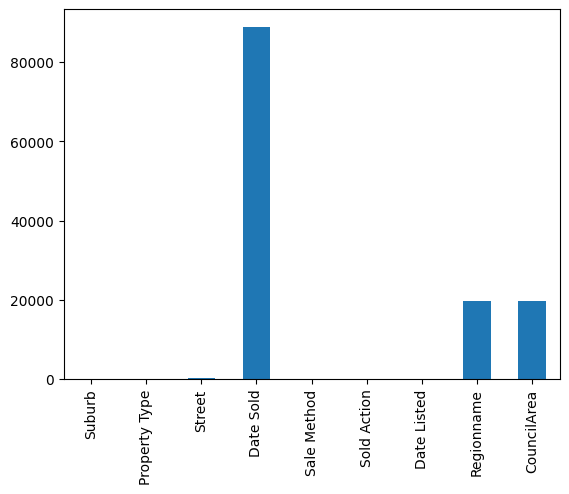

In [ ]:
# @title Default title text
cleaned_df[categorical].isnull().sum().plot.bar()
plt.show()

In [ ]:
# @title Default title text
round(cleaned_df[categorical].isnull().sum()/len(cleaned_df)*100,3)

,0
Suburb,0.006
Property Type,0.000
Street,0.140
Date Sold,81.994
Sale Method,0.018
Sold Action,0.018
Date Listed,0.018
Regionname,18.043
CouncilArea,18.043


The value missing for Date Sold is significantly high compared to the Date Listed. This will make it harder to check for the approximate time for a property to be sold in this market.

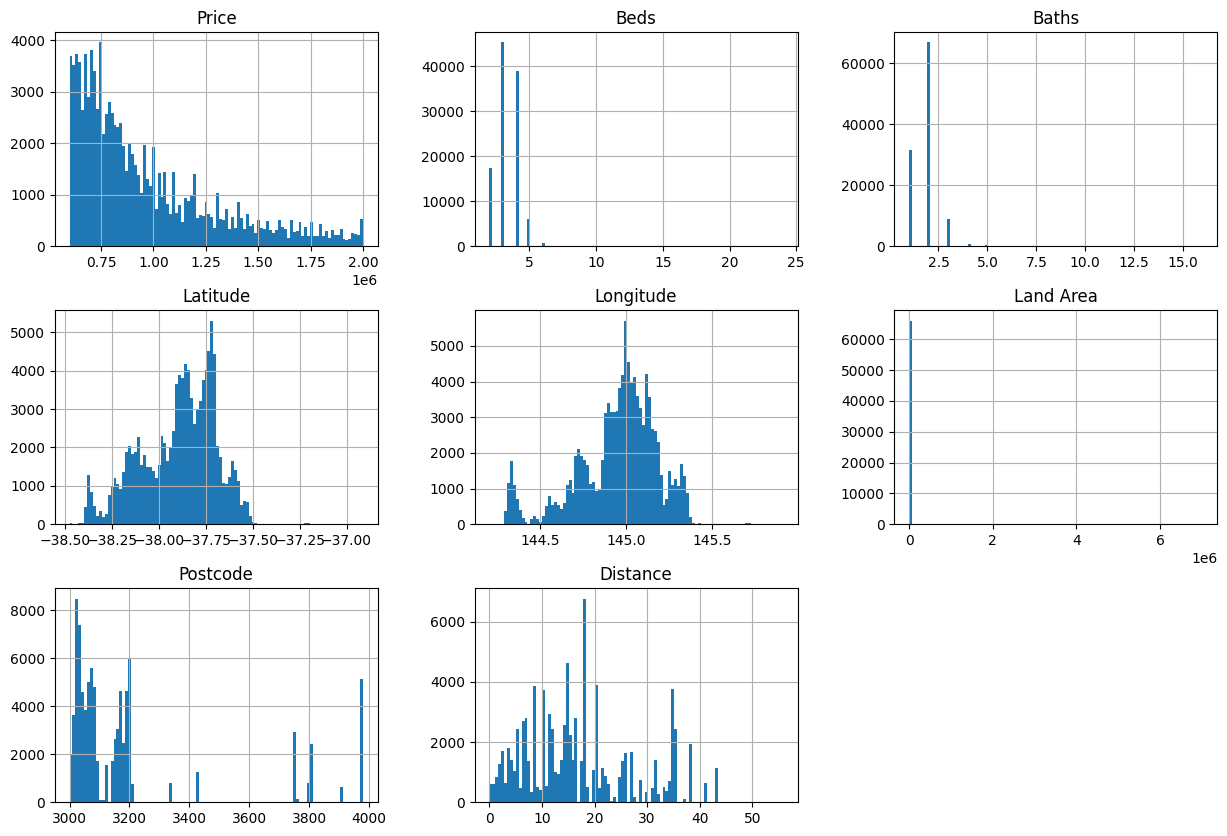

In [ ]:
# @title Default title text
# Inspect the distribution of numerical variables
cleaned_df[numerical].hist(bins=100, figsize=(15,10))
plt.show()

In [ ]:
# @title Default title text
pd.set_option('display.float_format', '{:,.2f}'.format)
cleaned_df[numerical].describe()

,Price,Beds,Baths,Date Sold,Latitude,Longitude,Date Listed,Land Area,Postcode,Distance,Month Listed,Year Listed,Days on Market,Month Sold,Year Sold
count,"108,449.00","108,449.00","108,442.00",19527,"108,436.00","108,436.00",108429,"66,151.00","88,882.00","88,882.00","108,429.00","108,429.00","19,523.00","19,527.00","19,527.00"
mean,"965,577.11",3.34,1.82,2022-12-13 14:56:10.528140544,-37.89,144.95,2023-02-12 07:27:09.509540608,968.39,"3,207.06",16.83,6.10,"2,022.65",25.28,6.54,"2,022.45"
min,"600,000.00",2.00,1.00,2011-08-28 13:30:00,-38.48,144.21,2011-03-01 21:10:20,0.00,"3,000.00",0.00,1.00,"2,011.00","-1,624.00",1.00,"2,011.00"
25%,"710,000.00",3.00,1.00,2022-04-02 11:00:00,-38.03,144.85,2022-06-08 14:53:32,425.00,"3,041.00",8.60,3.00,"2,022.00",23.00,4.00,"2,022.00"
50%,"850,000.00",3.00,2.00,2022-11-26 14:00:00,-37.86,144.99,2023-03-08 17:16:34,576.00,"3,088.00",14.80,6.00,"2,023.00",24.00,6.00,"2,022.00"
75%,"1,135,000.00",4.00,2.00,2023-10-28 11:30:00,-37.74,145.11,2023-11-03 07:49:12,690.00,"3,194.00",21.80,9.00,"2,023.00",28.00,10.00,"2,023.00"
max,"2,000,000.00",24.00,16.00,2024-09-07 11:30:00,-36.91,145.91,2024-08-22 15:49:38,"7,017,249.03","3,980.00",55.80,12.00,"2,024.00","1,296.00",12.00,"2,024.00"
std,"336,337.87",0.86,0.63,NaN,0.20,0.23,NaN,"28,096.72",276.40,10.44,3.30,1.02,32.43,3.31,1.19


In [ ]:
# @title Default title text
cleaned_df[categorical].describe()

,Suburb,Property Type,Street,Date Sold,Sale Method,Sold Action,Date Listed,Regionname,CouncilArea
count,108442,108449,108297,19527,108429,108429,108429,88882,88882
unique,426,10,105561,4100,2,4,107786,8,25
top,POINT COOK,House,5 Percy Street,2022-04-02 11:00:00,privateTreaty,privateTreaty,2022-10-06 21:05:30,Northern Metropolitan,Casey City Council
freq,2144,81840,5,66,88893,69664,4,24281,8126


From the description, we can see some detail of the data set such as top suburb along with their council area in the selling list in our time frame.

Now, we will check the distribution of Region and Council Area in our dataset.

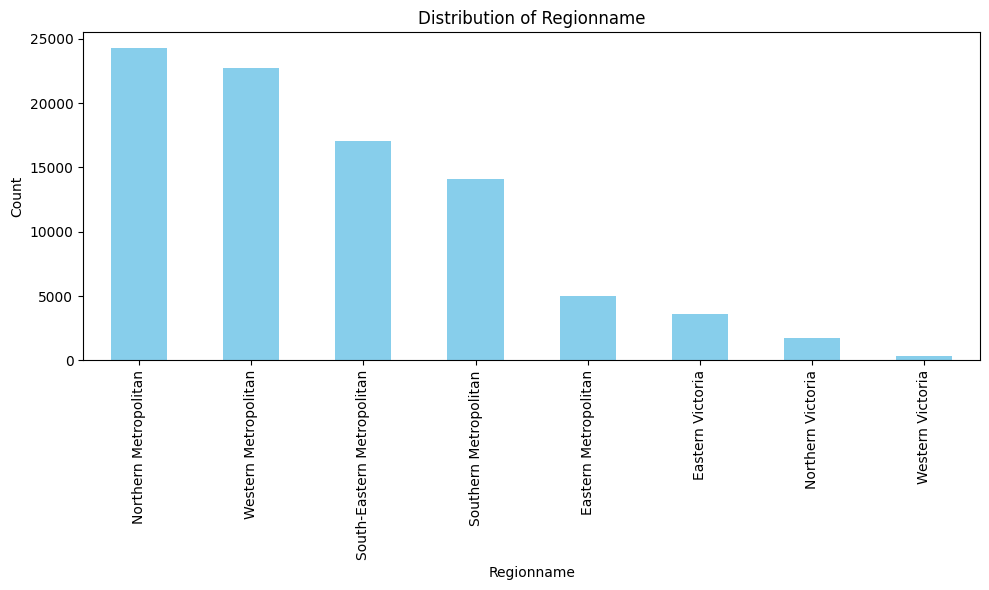

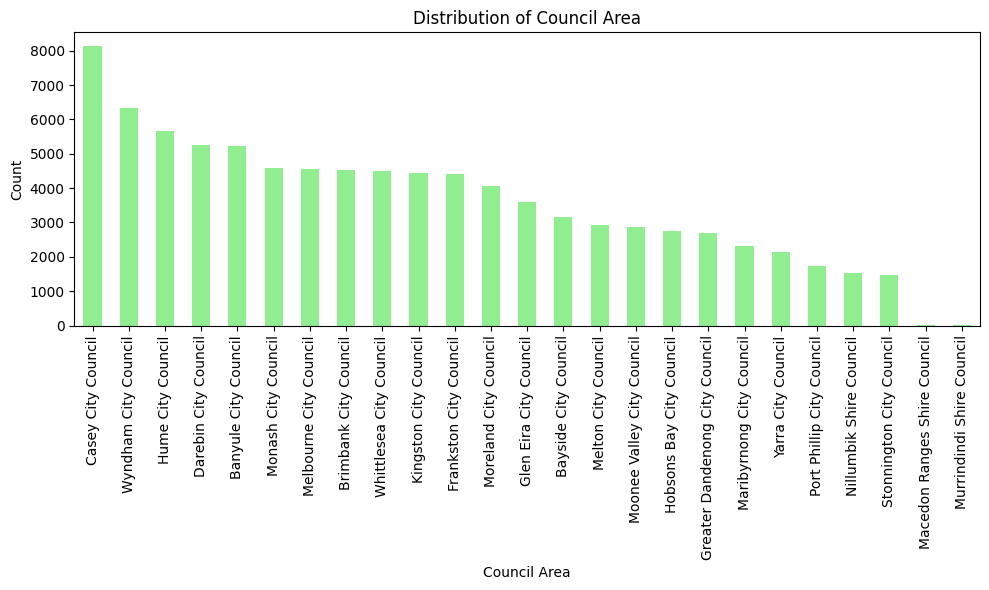

In [ ]:
# @title Default title text
# Plot the distribution for regionname
plt.figure(figsize=(10, 6))
cleaned_df['Regionname'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Regionname')
plt.xlabel('Regionname')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot the distribution for council area
plt.figure(figsize=(10, 6))
cleaned_df['CouncilArea'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Council Area')
plt.xlabel('Council Area')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Next, we are checking for outliers.

In [ ]:
# @title Default title text
cleaned_df[cleaned_df['Beds'] > 14]

,Price,Suburb,Property Type,Street,Beds,Baths,Date Sold,Latitude,Longitude,Sale Method,Sold Action,Date Listed,Land Area,Postcode,Regionname,Distance,CouncilArea
11243237,"$1,313,000",ROXBURGH PARK,House,3 Orbit Walk,24,16.0,NaN,-37.624607,144.91635,privateTreaty,auction,2024-04-08T18:57:56.000,1000.0,3064.0,Northern Metropolitan,20.6,Hume City Council
16165538,"$1,850,000",BRUNSWICK EAST,House,233 Nicholson Street,15,8.0,2023-03-18T15:00:00,-37.766750,144.98009,auction,privateTreaty,2023-03-09T00:16:41.000,384.0,3057.0,Northern Metropolitan,4.0,Moreland City Council


In [ ]:
# @title Default title text
cleaned_df[cleaned_df['Baths'] > 10]

,Price,Suburb,Property Type,Street,Beds,Baths,Date Sold,Latitude,Longitude,Sale Method,Sold Action,Date Listed,Land Area,Postcode,Regionname,Distance,CouncilArea
11243237,"$1,313,000",ROXBURGH PARK,House,3 Orbit Walk,24,16.0,NaN,-37.624607,144.91635,privateTreaty,auction,2024-04-08T18:57:56.000,1000.0,3064.0,Northern Metropolitan,20.6,Hume City Council
13886677,"$1,550,000",FRANKSTON,House,2 Heath Avenue,11,11.0,NaN,-38.149270,145.13080,privateTreaty,privateTreaty,2022-07-08T09:20:36.000,NaN,3199.0,South-Eastern Metropolitan,38.0,Frankston City Council
21549622,"$685,000",GLADSTONE PARK,House,1 Sherbourne Road,3,16.0,NaN,-37.694363,144.89377,privateTreaty,privateTreaty,2021-09-06T15:20:08.000,NaN,3043.0,Western Metropolitan,12.9,Hume City Council


In [ ]:
# @title Default title text
cleaned_df[cleaned_df['Land Area'] > 1000000]

,Price,Suburb,Property Type,Street,Beds,Baths,Date Sold,Latitude,Longitude,Sale Method,Sold Action,Date Listed,Land Area,Postcode,Regionname,Distance,CouncilArea
18816325,"625,000.00",EILDON,House,9 South Crescent,4,2.00,NaN,-37.24,145.90,privateTreaty,privateTreaty,2022-03-24T17:24:03.000,"7,017,249.03",NaN,NaN,NaN,NaN


The land area outliner information looks quite suspiciously incorrect. we will come back to examine it in more detail later.

We are now examining the criteria in Sale Method and Sold Action column

In [ ]:
# @title Default title text
cleaned_df['Sale Method'].value_counts()

,count
Sale Method,
privateTreaty,88893
auction,19536


In [ ]:
# @title Default title text
cleaned_df['Sold Action'].value_counts()

,count
Sold Action,
privateTreaty,69664
auction,34192
soldPriorToAuction,4517
notStated,56


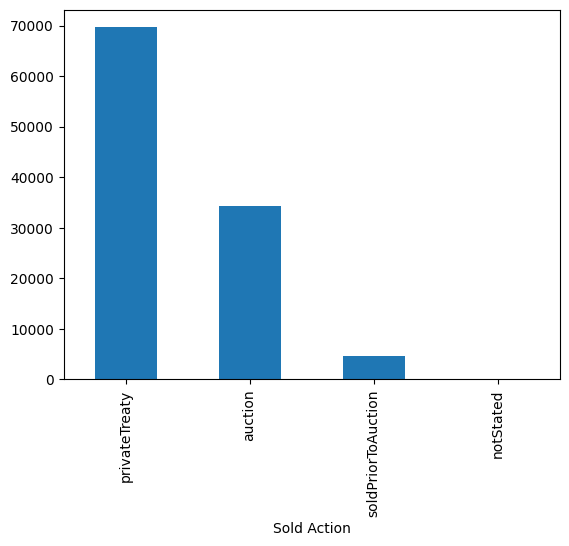

In [ ]:
# @title Default title text
cleaned_df['Sold Action'].value_counts().plot.bar()
plt.show()

We can see privateTreaty is the most method for house sale in this period. It looks like the market are in favor for buyers as they can negotiate the price for their potential property. We will break it down into month and year to compare the difference between the market from 2022 to current time to determine which timeframe is for buyers and for sellers market.

In [ ]:
# @title Default title text
cleaned_df['Date Listed'] = pd.to_datetime(cleaned_df['Date Listed'])
cleaned_df['Date Sold'] = pd.to_datetime(cleaned_df['Date Sold'])

<ipython-input-30-25817c2e1d84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Date Listed'] = pd.to_datetime(cleaned_df['Date Listed'])
<ipython-input-30-25817c2e1d84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Date Sold'] = pd.to_datetime(cleaned_df['Date Sold'])


In [ ]:
# @title Default title text
# Create 'Month Listed' and 'Year Listed' columns
cleaned_df['Month Listed'] = cleaned_df['Date Listed'].dt.month
cleaned_df['Year Listed'] = cleaned_df['Date Listed'].dt.year



<ipython-input-43-2f7d911ddc3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Month Listed'] = cleaned_df['Date Listed'].dt.month
<ipython-input-43-2f7d911ddc3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Year Listed'] = cleaned_df['Date Listed'].dt.year


In [ ]:
# @title Default title text
# Drop these columns which are created before
cleaned_df.drop(columns=['Days on Market', 'Month Sold', 'Year Sold'], inplace=True)

In [ ]:
# @title Default title text
# Function to map months to quarters
def month_to_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    elif month in [10, 11, 12]:
        return 'Q4'

# Apply the function to create the 'Quarter' column
cleaned_df['Quarter Listed'] = cleaned_df['Month Listed'].apply(month_to_quarter)

In [ ]:
# @title Default title text
# Save the file for analysis later
cleaned_df.to_csv('/content/drive/My Drive/Python/cleaned_data1.csv', index=False)

In [ ]:
# @title Default title text
# Read File
df = pd.read_csv('/content/drive/My Drive/Python/cleaned_data1.csv')

In [ ]:
# @title Default title text
df.head(10)

,Price,Suburb,Property Type,Street,Beds,Baths,Date Sold,Latitude,Longitude,Sale Method,Sold Action,Date Listed,Land Area,Postcode,Regionname,Distance,CouncilArea,Month Listed,Year Listed,Quarter Listed
0,645000.0,KINGS PARK,House,23 Gum Road,3,2.0,NaN,-37.739520,144.77538,privateTreaty,privateTreaty,2024-07-03 10:36:46,538.0,3021.0,Western Metropolitan,14.0,Brimbank City Council,7.0,2024.0,Q3
1,650000.0,ARMSTRONG CREEK,House,13 Stingray Street,4,2.0,NaN,-38.225506,144.37233,privateTreaty,privateTreaty,2024-07-08 12:48:49,370.0,NaN,NaN,NaN,NaN,7.0,2024.0,Q3
2,620000.0,BELL PARK,House,5 Devlin Court,3,1.0,NaN,-38.105427,144.33783,privateTreaty,privateTreaty,2024-07-19 13:09:10,612.0,NaN,NaN,NaN,NaN,7.0,2024.0,Q3
3,600000.0,CLYDE NORTH,House,13 Timble Way,3,2.0,NaN,-38.103363,145.32181,privateTreaty,privateTreaty,2024-07-09 14:40:02,238.0,3978.0,Eastern Victoria,43.4,Casey City Council,7.0,2024.0,Q3
4,650000.0,DOCKLANDS,ApartmentUnitFlat,1601E/888 Collins Street,2,2.0,NaN,-37.820583,144.94252,privateTreaty,privateTreaty,2024-06-03 17:21:54,NaN,3008.0,Southern Metropolitan,1.4,Melbourne City Council,6.0,2024.0,Q2
5,615000.0,KURUNJANG,House,5 Melrome Court,4,2.0,NaN,-37.663200,144.59163,privateTreaty,privateTreaty,2024-07-17 13:50:26,710.0,3337.0,Northern Victoria,31.7,Melton City Council,7.0,2024.0,Q3
6,606000.0,LAVERTON,House,7 Snowden Street,3,1.0,NaN,-37.854748,144.77370,privateTreaty,privateTreaty,2024-07-22 14:17:16,625.0,3028.0,Western Metropolitan,15.5,Hobsons Bay City Council,7.0,2024.0,Q3
7,605000.0,MAMBOURIN,House,13 Nuttall Street,4,2.0,NaN,-37.888107,144.59637,privateTreaty,privateTreaty,2024-07-09 11:30:15,400.0,NaN,NaN,NaN,NaN,7.0,2024.0,Q3
8,620000.0,PASCOE VALE,ApartmentUnitFlat,3/77 Northumberland Road,2,1.0,2024-08-17 10:30:00,-37.723038,144.93169,auction,auction,2024-07-18 14:13:06,173.0,3044.0,Northern Metropolitan,8.5,Moreland City Council,7.0,2024.0,Q3
9,600000.0,ROXBURGH PARK,House,40 Arena Avenue,3,2.0,2024-08-17 13:30:00,-37.621098,144.91699,auction,auction,2024-08-01 10:59:07,210.0,3064.0,Northern Metropolitan,20.6,Hume City Council,8.0,2024.0,Q3


II. Data preparation

1. Data cleaning

In this part, we will remove outliners and deal with missing values.

Firstly, we will the missing value here.


In [ ]:
# @title Default title text
df.isnull().sum()

,0
Price,0
Suburb,7
Property Type,0
Street,152
Beds,0
Baths,7
Date Sold,88922
Latitude,13
Longitude,13
Sale Method,20


In [ ]:
# @title Default title text
round(df.isnull().sum()/len(df)*100,3)

,0
Price,0.000
Suburb,0.006
Property Type,0.000
Street,0.140
Beds,0.000
Baths,0.006
Date Sold,81.994
Latitude,0.012
Longitude,0.012
Sale Method,0.018


As we can see, about 82% of our date sold is missing. We will try to fill it with date listed, price range, suburb, beds and baths details. We will use the average days on the market for the data we have with the relevant suburb, beds and baths details.

In [ ]:
# @title Default title text
from datetime import timedelta

# Convert 'Date Listed' and 'Date Sold' columns to datetime format
df['Date Listed'] = pd.to_datetime(df['Date Listed'])
df['Date Sold'] = pd.to_datetime(df['Date Sold'])

# Calculate the time difference for rows where 'date sold' is available
df['days_on_market'] = (df['Date Sold'] - df['Date Listed']).dt.days

# Calculate the average days on market for each suburb, considering similar properties
avg_days_on_market = df.groupby(['Suburb', 'Beds', 'Baths'])['days_on_market'].mean()

# Function to fill missing 'date_sold' values
def fill_date_sold(row):
    if pd.isna(row['Date Sold']):
        avg_days = avg_days_on_market.get((row['Suburb'], row['Beds'], row['Baths']), np.nan)
        if not pd.isna(avg_days):
            return row['Date Listed'] + timedelta(days=int(avg_days))
    return row['Date Sold']

# Apply the function to the DataFrame
df['Date Sold'] = df.apply(fill_date_sold, axis=1)

In [ ]:
# @title Default title text
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108449 entries, 0 to 108448
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Price           108449 non-null  float64       
 1   Suburb          108442 non-null  object        
 2   Property Type   108449 non-null  object        
 3   Street          108297 non-null  object        
 4   Beds            108449 non-null  int64         
 5   Baths           108442 non-null  float64       
 6   Date Sold       99667 non-null   datetime64[ns]
 7   Latitude        108436 non-null  float64       
 8   Longitude       108436 non-null  float64       
 9   Sale Method     108429 non-null  object        
 10  Sold Action     108429 non-null  object        
 11  Date Listed     108429 non-null  datetime64[ns]
 12  Land Area       66151 non-null   float64       
 13  Postcode        88882 non-null   float64       
 14  Regionname      88882 non-null   obj

Next, the distance column we have is the estimation from the council area and suburb to the CBD. We create a new column using the latitude and longitude of all the address to determine the distance to Melbourne CBD.

In [ ]:
# @title Default title text
# Import Haversine function from a library
from geopy.distance import geodesic

# Coordinates of Melbourne CBD
central_lat = -37.8136
central_long = 144.9631

# Function to calculate the distance using the Haversine formula
def calculate_distance(row, central_coords):
    if pd.notna(row['Latitude']) and pd.notna(row['Longitude']):
        street_coords = (row['Latitude'], row['Longitude'])
        return geodesic(street_coords, central_coords).kilometers
    else:
        return np.nan  # Return NaN if coordinates are missing

# Apply the function to each row in the DataFrame
central_coords = (central_lat, central_long)
df['Distance_to_CBD'] = df.apply(calculate_distance, axis=1, central_coords=central_coords)


In [ ]:
# @title Default title text
df

,Price,Suburb,Property Type,Street,Beds,Baths,Date Sold,Latitude,Longitude,Sale Method,...,Land Area,Postcode,Regionname,Distance,CouncilArea,Month Listed,Year Listed,Quarter Listed,days_on_market,Distance_to_CBD
0,645000.0,KINGS PARK,House,23 Gum Road,3,2.0,2024-07-29 10:36:46,-37.739520,144.77538,privateTreaty,...,538.0,3021.0,Western Metropolitan,14.0,Brimbank City Council,7.0,2024.0,Q3,NaN,18.469036
1,650000.0,ARMSTRONG CREEK,House,13 Stingray Street,4,2.0,2024-08-05 12:48:49,-38.225506,144.37233,privateTreaty,...,370.0,NaN,NaN,NaN,NaN,7.0,2024.0,Q3,NaN,69.147067
2,620000.0,BELL PARK,House,5 Devlin Court,3,1.0,2024-08-20 13:09:10,-38.105427,144.33783,privateTreaty,...,612.0,NaN,NaN,NaN,NaN,7.0,2024.0,Q3,NaN,63.785539
3,600000.0,CLYDE NORTH,House,13 Timble Way,3,2.0,2024-08-01 14:40:02,-38.103363,145.32181,privateTreaty,...,238.0,3978.0,Eastern Victoria,43.4,Casey City Council,7.0,2024.0,Q3,NaN,45.035395
4,650000.0,DOCKLANDS,ApartmentUnitFlat,1601E/888 Collins Street,2,2.0,2024-07-02 17:21:54,-37.820583,144.94252,privateTreaty,...,NaN,3008.0,Southern Metropolitan,1.4,Melbourne City Council,6.0,2024.0,Q2,NaN,1.970871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108444,1310000.0,LEOPOLD,House,35 Viewbay Drive,4,2.0,2021-11-20 11:30:00,-38.176357,144.47014,auction,...,1121.0,NaN,NaN,NaN,NaN,11.0,2021.0,Q4,-7.0,59.128572
108445,1330000.0,SPOTSWOOD,House,16 Ferguson Street,4,2.0,2021-10-02 10:30:00,-37.825806,144.87238,auction,...,460.0,3015.0,Western Metropolitan,6.2,Hobsons Bay City Council,8.0,2021.0,Q3,32.0,8.101707
108446,1314000.0,GLEN WAVERLEY,Townhouse,1/24 Roberts Street,4,3.0,2021-11-18 18:30:00,-37.891210,145.16698,auction,...,NaN,3150.0,Eastern Metropolitan,16.7,Monash City Council,11.0,2021.0,Q4,-1.0,19.903764
108447,1350000.0,BURWOOD,House,34 Beddows Street,8,3.0,2021-08-29 15:30:41,-37.853073,145.11566,privateTreaty,...,513.0,3125.0,Southern Metropolitan,10.4,Monash City Council,9.0,2021.0,Q3,NaN,14.126564


Examining few rows in the table, we can see the distance and distance to CBD are quite match each other. We can now drop latitude, longitude, postcode, distance from our table.

In [ ]:
# @title Default title text
# Drop these columns which are created before
df.drop(columns=['Latitude', 'Longitude', 'Postcode', 'Distance'], inplace=True)

In [ ]:
# @title Default title text
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108449 entries, 0 to 108448
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Price            108449 non-null  float64       
 1   Suburb           108442 non-null  object        
 2   Property Type    108449 non-null  object        
 3   Street           108297 non-null  object        
 4   Beds             108449 non-null  int64         
 5   Baths            108442 non-null  float64       
 6   Date Sold        99667 non-null   datetime64[ns]
 7   Sale Method      108429 non-null  object        
 8   Sold Action      108429 non-null  object        
 9   Date Listed      108429 non-null  datetime64[ns]
 10  Land Area        66151 non-null   float64       
 11  Regionname       88882 non-null   object        
 12  CouncilArea      88882 non-null   object        
 13  Month Listed     108429 non-null  float64       
 14  Year Listed      108

In [ ]:
# @title Default title text
# Create 'Month Sold' and 'Year Sold' columns
df['Month Sold'] = df['Date Sold'].dt.month
df['Year Sold'] = df['Date Sold'].dt.year


NameError: name 'df' is not defined

In [ ]:
# @title Default title text
# Function to map months to quarters
def month_to_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    elif month in [10, 11, 12]:
        return 'Q4'

# Apply the function to create the 'Quarter' column
df['Quarter Sold'] = df['Month Sold'].apply(month_to_quarter)

Create one more column called days_on_market_update_fill that is calculated based on the filling missing details for date sold.

In [ ]:
# @title Default title text
# Calculate the difference in days
df['days_on_market_update_fill'] = (df['Date Sold'] - df['Date Listed']).dt.days

As we will examine most of the data in the last 2 years, we will remove all the data that have date listed before 1/1/2022.

In [ ]:
# @title Default title text
# Define the cutoff date
cutoff_date = pd.to_datetime('2022-01-01')

# Filter out rows where 'Date Listed' is before the cutoff date
filtered_df = df[df['Date Listed'] >= cutoff_date]

print(filtered_df)

            Price           Suburb      Property Type  \
0        645000.0       KINGS PARK              House   
1        650000.0  ARMSTRONG CREEK              House   
2        620000.0        BELL PARK              House   
3        600000.0      CLYDE NORTH              House   
4        650000.0        DOCKLANDS  ApartmentUnitFlat   
...           ...              ...                ...   
108373  1310000.0       CHELTENHAM          Townhouse   
108381  1310000.0         WERRIBEE              House   
108434  1350000.0        MOORABBIN          Townhouse   
108438  1350000.0      COLLINGWOOD              House   
108439  1350500.0     MOUNT MARTHA              House   

                          Street  Beds  Baths           Date Sold  \
0                    23 Gum Road     3    2.0 2024-07-29 10:36:46   
1             13 Stingray Street     4    2.0 2024-08-05 12:48:49   
2                 5 Devlin Court     3    1.0 2024-08-20 13:09:10   
3                  13 Timble Way     3 

In [ ]:
# @title Default title text
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99362 entries, 0 to 108439
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Price                       99362 non-null  float64       
 1   Suburb                      99355 non-null  object        
 2   Property Type               99362 non-null  object        
 3   Street                      99228 non-null  object        
 4   Beds                        99362 non-null  int64         
 5   Baths                       99356 non-null  float64       
 6   Date Sold                   91332 non-null  datetime64[ns]
 7   Sale Method                 99362 non-null  object        
 8   Sold Action                 99362 non-null  object        
 9   Date Listed                 99362 non-null  datetime64[ns]
 10  Land Area                   60671 non-null  float64       
 11  Regionname                  81530 non-null  object        

In [ ]:
# @title Save file
# Save the file for analysis later
filtered_df.to_csv('/content/drive/My Drive/Python/cleaned_data2.csv', index=False)

In [ ]:
# @title Default title text
df = pd.read_csv('/content/drive/My Drive/Python/cleaned_data2.csv')

We are now trying to fill in the data for land area using the linear regression model on relevant price and suburb.

In [ ]:
# @title Median price by Land Area
# Calculate the median Land Area for each combination of Suburb and Property Type
median_land_area = df.groupby(['Suburb', 'Property Type'])['Land Area'].transform('median')

# Fill missing Land Area with the corresponding median value
df['Land Area'].fillna(median_land_area, inplace=True)

print(df)

             Price           Suburb      Property Type  \
0       645,000.00       KINGS PARK              House   
1       650,000.00  ARMSTRONG CREEK              House   
2       620,000.00        BELL PARK              House   
3       600,000.00      CLYDE NORTH              House   
4       650,000.00        DOCKLANDS  ApartmentUnitFlat   
...            ...              ...                ...   
99357 1,310,000.00       CHELTENHAM          Townhouse   
99358 1,310,000.00         WERRIBEE              House   
99359 1,350,000.00        MOORABBIN          Townhouse   
99360 1,350,000.00      COLLINGWOOD              House   
99361 1,350,500.00     MOUNT MARTHA              House   

                         Street  Beds  Baths            Date Sold  \
0                   23 Gum Road     3   2.00  2024-07-29 10:36:46   
1            13 Stingray Street     4   2.00  2024-08-05 12:48:49   
2                5 Devlin Court     3   1.00  2024-08-20 13:09:10   
3                 13 Timble

In [ ]:
# @title Default title text
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99362 entries, 0 to 99361
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       99362 non-null  float64
 1   Suburb                      99355 non-null  object 
 2   Property Type               99362 non-null  object 
 3   Street                      99228 non-null  object 
 4   Beds                        99362 non-null  int64  
 5   Baths                       99356 non-null  float64
 6   Date Sold                   91332 non-null  object 
 7   Sale Method                 99362 non-null  object 
 8   Sold Action                 99362 non-null  object 
 9   Date Listed                 99362 non-null  object 
 10  Land Area                   98229 non-null  float64
 11  Regionname                  81530 non-null  object 
 12  CouncilArea                 81530 non-null  object 
 13  Month Listed                993

In [ ]:
# @title Save main file
# Save the file for analysis later
df.to_csv('/content/drive/My Drive/Python/cleaned_data_main.csv', index=False)

In [ ]:
# @title Default title text
df = pd.read_csv('/content/drive/My Drive/Python/cleaned_data_main.csv')

In [ ]:
# @title Default title text
round(df.isnull().sum()/len(df)*100,3)

,0
Price,0.00
Suburb,0.01
Property Type,0.00
Street,0.14
Beds,0.00
Baths,0.01
Date Sold,8.08
Sale Method,0.00
Sold Action,0.00
Date Listed,0.00


Although it is still showing the lack of data in some columns, having over 80% of data entries may be sufficient for us to dive more into our analysis.

Now, we are looking at how the market performed the last two years.

In [ ]:
# @title Price trends last 2 years
# Calculate monthly totals for each year
lst_2022 = df[df['Year Listed'] == 2022].groupby('Month Listed')['Price'].sum().tolist()
lst_2023 = df[df['Year Listed'] == 2023].groupby('Month Listed')['Price'].sum().tolist()
lst_2024 = df[df['Year Listed'] == 2024].groupby('Month Listed')['Price'].sum().tolist()

# Calculate percent change between years
def percent_change(old_val, new_val):
    return (new_val - old_val) / old_val * 100

# Lists to store percent changes
first_perchange_lst = []
second_perchange_lst = []

# For the months between the years 2022-2023
for old, new in zip(lst_2022, lst_2023):
    first_perchange_lst.append(percent_change(old, new))

# For the months between the years 2023-2024
for old, new in zip(lst_2023, lst_2024):
    second_perchange_lst.append(percent_change(old, new))

# Convert to NumPy arrays for plotting
per_2022_2023 = np.array(first_perchange_lst)
per_2023_2024 = np.array(second_perchange_lst)

# Month labels
month_labels = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

# Create traces for the plot
trace0 = go.Scatter(
    x=month_labels,
    y=per_2022_2023,
    name='Percent Change (2022-2023)',
    text='% Change',
    line=dict(
        color='rgb(205, 12, 24)',
        width=4,
        dash='dash'
    )
)

trace1 = go.Scatter(
    x=month_labels,
    y=per_2023_2024,
    name='Percent Change (2023-2024)',
    text='% Change',
    line=dict(
        color='rgb(0, 192, 98)',
        width=4,
        dash='dash'
    )
)

# Combine the data and create the layout
data = [trace0, trace1]
layout = dict(
    title='Percent Change in House Prices by Month',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Percent Change (%)'),
    paper_bgcolor='rgb(255, 255, 224)',
    plot_bgcolor='rgb(245, 245, 245)'
)

# Create the figure using the data and layout
fig = go.Figure(data=data, layout=layout)

# Show the plot
fig.show()




In [ ]:
# @title Month changes trends
# Function to calculate month-year sales
def month_year_sales(df, month, year):
    return df['Price'].loc[(df['Month Listed'] == month) & (df['Year Listed'] == year)].sum()

# List of months
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']

# Create a dictionary to hold sales data by year
sales_data = {}
years = [2022, 2023, 2024]

for year in years:
    monthly_sales = [month_year_sales(df, month, year) for month in range(1, 13)]
    sales_data[year] = monthly_sales

# Create traces for each year
plot_2022 = go.Scatter(
    x=labels,
    y=sales_data[2022],
    mode='markers',
    name='2022',
    marker=dict(
        color='rgba(0, 128, 128, 0.95)',
        line=dict(color='rgba(56, 56, 56, 1)', width=1.5),
        symbol='circle',
        size=16,
    )
)

plot_2023 = go.Scatter(
    x=labels,
    y=sales_data[2023],
    mode='markers',
    name='2023',
    marker=dict(
        color='rgba(255, 72, 72, 0.95)',
        line=dict(color='rgba(56, 56, 56, 1)', width=1.5),
        symbol='circle',
        size=16,
    )
)

# Truncate 2024 to August
plot_2024 = go.Scatter(
    x=labels[:8],
    y=sales_data[2024][:8],
    mode='markers',
    name='2024',
    marker=dict(
        color='rgba(72, 255, 72, 0.95)',
        line=dict(color='rgba(56, 56, 56, 1)', width=1.5),
        symbol='circle',
        size=16,
    )
)

# Combine all plots
data = [plot_2022, plot_2023, plot_2024]

# Layout settings
layout = go.Layout(
    title="Sales by Month for the Years <br> (2022, 2023, 2024)",
    xaxis=dict(
        title='Month',
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont=dict(color='rgb(102, 102, 102)'),
    ),
    yaxis=dict(
        title='Sales',
        showgrid=True,
        zeroline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont=dict(color='rgb(102, 102, 102)'),
    ),
    margin=dict(
        l=140,
        r=40,
        b=50,
        t=80
    ),
    legend=dict(
        font=dict(size=10),
        yanchor='top',
        xanchor='left',
    ),
    width=800,
    height=600,
    paper_bgcolor='rgb(255, 255, 224)',
    plot_bgcolor='rgb(255, 255, 246)',
    hovermode='closest',
)

# Create and plot the figure
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='sales-by-month')

# Save the plot as an HTML file
fig.write_html("sales_by_month_plots_chart.html")

From two charts above, we can draw some ideas about the market.

- The market experienced substantial growth in the first half of 2022, followed by a slowdown in the latter half of 2022 and the first half of 2023. This trend can be logically attributed to the low interest rates in 2021, with the rapid rate hikes starting in mid-2022 dampening market momentum.

- Feb/2024 brings in a huge contribution for the price sales despite the slowdown in the same period of 2023. However, prices after Feb 2024 are plummeting despite the recent increase. This decline can be linked to the Reserve Bank of Australia's decision to keep interest rates steady in recent months instead of reducing the rates as predicted.

- Although the data only covers up till Aug 2024, we can predict the market may keep at this slow pace till early next year if the rate remains unchanged.

In [ ]:
# @title Default title text
median_price_by_suburb = df.groupby('Suburb')[['Price','Land Area']].median()
sorted_median_price = median_price_by_suburb.sort_values(by='Price', ascending=False)
# Get the top 20 suburbs
top_20_suburbs = sorted_median_price.head(20)

# Get the bottom 20 suburbs
bottom_20_suburbs = sorted_median_price.tail(20)

# Display the top 20 and bottom 20 suburbs
print("Top 20 Suburbs by Median Price:")
print(top_20_suburbs)

print("\nBottom 20 Suburbs by Median Price:")
print(bottom_20_suburbs)

Top 20 Suburbs by Median Price:
                        Price     Land Area
Suburb                                     
MERRICKS BEACH      1912500.0    985.500000
RED HILL SOUTH      1875000.0   1148.000000
YAN YEAN            1850000.0  34200.000000
MAIN RIDGE          1850000.0  10926.512334
WILDWOOD            1850000.0  68796.559140
LYSTERFIELD SOUTH   1812500.0   2087.500000
FINGAL              1742500.0    782.000000
KANGAROO GROUND     1712500.0  38729.587982
POINT LEO           1700000.0   1025.000000
WALLINGTON          1695000.0   9900.539089
HUMEVALE            1675000.0  81100.000000
BALNARRING BEACH    1665000.0    820.000000
PORTSEA             1660000.0    623.500000
YARRAMBAT           1650000.0  10257.000000
BEAUMARIS           1650000.0    450.000000
SHOREHAM            1645000.0    887.000000
NARRE WARREN NORTH  1630000.0   2116.500000
WATERWAYS           1620000.0    674.500000
LANGWARRIN SOUTH    1612500.0   8090.784630
SORRENTO            1610000.0    785.000000


We can see the list of top and bottom 20 suburbs with the median price in our table. However, the size of the land also significantly drive the value of the suburbs. We now will try to limit the size to under 1000m2.

In [ ]:
# @title Top and bottom 20 Suburb house prices
# Filter the DataFrame to include only suburbs with a median Land Area < 1000
filtered_median_price_by_suburb = median_price_by_suburb[median_price_by_suburb['Land Area'] < 1000]

# Sort the filtered suburbs by the median price in descending order
sorted_median_price_by_land = filtered_median_price_by_suburb.sort_values(by='Price', ascending=False)

# Get the top 20 suburbs by median price with Land Area < 1000
top_20_suburbs_by_land = sorted_median_price_by_land.head(20)

# Get the bottom 20 suburbs by median price with Land Area < 1000
bottom_20_suburbs_by_land = sorted_median_price_by_land.tail(20)

# Display the top 20 and bottom 20 suburbs
print("Top 20 Suburbs by Median Price (Land Area < 1000):")
print(top_20_suburbs_by_land)

print("\nBottom 20 Suburbs by Median Price (Land Area < 1000):")
print(bottom_20_suburbs_by_land)

Top 20 Suburbs by Median Price (Land Area < 1000):
                      Price  Land Area
Suburb                                
MERRICKS BEACH    1912500.0      985.5
FINGAL            1742500.0      782.0
BALNARRING BEACH  1665000.0      820.0
PORTSEA           1660000.0      623.5
BEAUMARIS         1650000.0      450.0
SHOREHAM          1645000.0      887.0
WATERWAYS         1620000.0      674.5
SORRENTO          1610000.0      785.0
ALBERT PARK       1595000.0      163.0
MIDDLE PARK       1537892.5      169.5
BRIGHTON EAST     1520000.0      338.0
ST ANDREWS BEACH  1512500.0      877.0
FLINDERS          1487500.0      850.0
GLEN WAVERLEY     1467500.0      654.0
BREAMLEA          1452500.0      732.5
CONNEWARRE        1450000.0      835.0
GARDENVALE        1438000.0      475.0
QUEENSCLIFF       1430000.0      390.0
EAGLEMONT         1415000.0      489.0
ABERFELDIE        1400000.0      591.0

Bottom 20 Suburbs by Median Price (Land Area < 1000):
                    Price  Land Area

Now, we are looking at the median price in terms of region area.

In [ ]:
# @title Region name
df['Regionname'].unique()

array(['Western Metropolitan', nan, 'Eastern Victoria',
       'Southern Metropolitan', 'Northern Victoria',
       'Northern Metropolitan', 'South-Eastern Metropolitan',
       'Western Victoria', 'Eastern Metropolitan'], dtype=object)

In [ ]:
# @title Default title text
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot

In [ ]:
# @title Price distribution per region
# Price by Region
all_regions = df['Price'].values
western_metropolitan = df['Price'].loc[df['Regionname'] == 'Western Metropolitan'].values
southern_metropolitan = df['Price'].loc[df['Regionname'] == 'Southern Metropolitan'].values
northern_metropolitan = df['Price'].loc[df['Regionname'] == 'Northern Metropolitan'].values
eastern_metropolitan = df['Price'].loc[df['Regionname'] == 'Eastern Metropolitan'].values
southeastern_metropolitan = df['Price'].loc[df['Regionname'] == 'South-Eastern Metropolitan'].values
eastern_victoria = df['Price'].loc[df['Regionname'] == 'Eastern Victoria'].values
northern_victoria = df['Price'].loc[df['Regionname'] == 'Northern Victoria'].values
western_victoria = df['Price'].loc[df['Regionname'] == 'Western Victoria'].values
gaussian_distribution = np.log(df['Price'].values)


# Histograms
fig = tools.make_subplots(
    rows=6, cols=2, print_grid=False, specs=[[{'colspan': 2}, None], [{}, {}], [{}, {}], [{}, {}], [{}, {}], [{'colspan': 2}, None]],
    subplot_titles=(
        'Overall Price Distribution',
        'Northern Metropolitan',
        'Southern Metropolitan',
        'Eastern Metropolitan',
        'Western Metropolitan',
        'South-Eastern Metropolitan',
        'Northern Victoria',
        'Eastern Victoria',
        'Western Victoria',
        'Gaussian Distribution of Price'
    )
)

fig.add_trace(go.Histogram(x=all_regions, name='All Regions', marker=dict(color='#6E6E6E')), row=1, col=1)
fig.add_trace(go.Histogram(x=northern_metropolitan, name='Northern Metropolitan', marker=dict(color='#2E9AFE')), row=2, col=1)
fig.add_trace(go.Histogram(x=southern_metropolitan, name='Southern Metropolitan', marker=dict(color='#FA5858')), row=2, col=2)
fig.add_trace(go.Histogram(x=eastern_metropolitan, name='Eastern Metropolitan', marker=dict(color='#81F781')), row=3, col=1)
fig.add_trace(go.Histogram(x=western_metropolitan, name='Western Metropolitan', marker=dict(color='#BE81F7')), row=3, col=2)
fig.add_trace(go.Histogram(x=southeastern_metropolitan, name='South-Eastern Metropolitan', marker=dict(color='#FE9A2E')), row=4, col=1)
fig.add_trace(go.Histogram(x=northern_victoria, name='Northern Victoria', marker=dict(color='#04B4AE')), row=4, col=2)
fig.add_trace(go.Histogram(x=eastern_victoria, name='Eastern Victoria', marker=dict(color='#088A08')), row=5, col=1)
fig.add_trace(go.Histogram(x=western_victoria, name='Western Victoria', marker=dict(color='#8A0886')), row=5, col=2)
fig.add_trace(go.Histogram(x=gaussian_distribution, histnorm='probability', name='Gaussian Distribution', marker=dict(color='#800000')), row=6, col=1)

fig.update_layout(showlegend=False, title="Price Distributions by Region", height=1200, width=800)
iplot(fig)

Output hidden; open in https://colab.research.google.com to view.

- In our data, most of the house is still under 1 million.
- Housing in Southern and Eastern Metropolitan are more pricey compared to other regions.
- Houses price in Northern area are increasing, we can look for some suburbs in this area for more research.


In [ ]:
# @title Sales area
# Small Function for Sales Percentage
def region_sales_percentage(df, region, sales=total_sales):
    sales_percentage = (df['Price'].loc[df['Regionname'] == region].sum()/sales) * 100
    return sales_percentage

# Sales percentage per Region
northernmet_salesper = region_sales_percentage(df, region='Northern Metropolitan')
westernmet_salesper = region_sales_percentage(df, region='Western Metropolitan')
southernmet_salesper = region_sales_percentage(df, region='Southern Metropolitan')
easternmet_salesper = region_sales_percentage(df, region='Eastern Metropolitan')
south_easternmet_salesper = region_sales_percentage(df, region='South-Eastern Metropolitan')
northernvic_salesper = region_sales_percentage(df, region='Northern Victoria')
westernvic_salesper = region_sales_percentage(df, region='Western Victoria')
easternvic_salesper = region_sales_percentage(df, region='Eastern Victoria')

# Total Sales Sum per Region
northernmet_total_sales = df['Price'].loc[df['Regionname'] == 'Northern Metropolitan'].sum()
westernmet_total_sales = df['Price'].loc[df['Regionname'] == 'Western Metropolitan'].sum()
southernmet_total_sales = df['Price'].loc[df['Regionname'] == 'Southern Metropolitan'].sum()
easternmet_total_sales = df['Price'].loc[df['Regionname'] == 'Eastern Metropolitan'].sum()
south_easternmet_total_sales = df['Price'].loc[df['Regionname'] == 'South-Eastern Metropolitan'].sum()
northernvic_total_sales = df['Price'].loc[df['Regionname'] == 'Northern Victoria'].sum()
westernvic_total_sales = df['Price'].loc[df['Regionname'] == 'Western Victoria'].sum()
easternvic_total_sales = df['Price'].loc[df['Regionname'] == 'Eastern Victoria'].sum()

# Prepare Data for Plot
labels = ['Northern Metropolitan', 'Western Metropolitan', 'Southern Metropolitan', 'Eastern Metropolitan',
         'South-Eastern Metropolitan', 'Northern Victoria', 'Western Victoria', 'Eastern Victoria']

salesper_data = [northernmet_salesper, westernmet_salesper, southernmet_salesper, easternmet_salesper,
                 south_easternmet_salesper, northernvic_salesper, westernvic_salesper, easternvic_salesper]

total_sales_data = [northernmet_total_sales, westernmet_total_sales, southernmet_total_sales, easternmet_total_sales,
                    south_easternmet_total_sales, northernvic_total_sales, westernvic_total_sales, easternvic_total_sales]

# Create Plots
sales_percent_plot = go.Bar(
    x=salesper_data,
    y=labels,
    marker=dict(
        color='rgba(152, 251, 152, 0.6)',
        line=dict(
            color='rgba(12, 218, 12, 1)',
            width=1),
    ),
    name='Sales Percentage of Houses per Region',
    orientation='h'
)

total_sales_plot = go.Scatter(
    x=total_sales_data,
    y=labels,
    mode='markers',
    marker=dict(
        color='rgb(34, 178, 178)',
        size=8
    ),
    name='Total Sales per Region / (in Australian Dollars ($AUD))'
)

# Layout settings
layout = go.Layout(
    title='Total Sales in Melbourne Real Estate Market',
    yaxis=dict(
        showgrid=True,
        showline=True,
        showticklabels=True,
        title='Region',
        tickangle=0,
        domain=[0, 0.85]
    ),
    yaxis2=dict(
        showgrid=True,
        showline=True,
        showticklabels=False,
        title='Total Sales ($AUD)',
        tickangle=0,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=2,
        domain=[0, 0.85],
        anchor='x',
        side='right'
    ),
    xaxis=dict(
        zeroline=True,
        showline=True,
        showticklabels=True,
        showgrid=True,
        title='Sales Percentage'
    ),
    xaxis2=dict(
        zeroline=True,
        showline=True,
        showticklabels=True,
        showgrid=True,
        title='Total Sales',
        dtick=25000,
        side='top',
        domain=[0.47, 1]
    ),
    legend=dict(
        x=0.029,
        y=1.038,
        font=dict(size=10)
    ),
    margin=dict(
        l=100,
        r=220,
        t=70,
        b=70
    ),
    paper_bgcolor='rgb(255, 255, 224)',
    plot_bgcolor='rgb(255, 255, 246)'
)

# Adding annotations with 2 decimal places
annotations = []
for ydn, yd, xd in zip(total_sales_data, salesper_data, labels):
    annotations.append(dict(xref='x2', yref='y2',
                            y=xd, x=ydn * 2,
                            text='{:.2f}'.format(ydn / 1e6) + 'M',
                            ax=50,
                            ay=20,
                            xanchor='left',
                            yanchor='middle',
                            font=dict(family='Arial', size=12,
                                      color='rgb(17, 87, 87)'),
                            showarrow=False,
                            arrowhead=3))
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x=yd + 6,
                            text='{:.2f}'.format(yd) + '%',
                            font=dict(family='Arial', size=12,
                                      color='rgb(7, 143, 7)'),
                            showarrow=False))

annotations.append(dict(xref='paper', yref='paper',
                        x=-0.1, y=-0.109,
                        text='Source: Plotly Documentation (Horizontal Bar Charts)',
                        font=dict(family='Arial', size=10,
                                  color='rgb(102, 102, 102)'),
                        showarrow=False))

layout['annotations'] = annotations

# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_yaxes=True,
                          vertical_spacing=0.001)

fig.add_trace(sales_percent_plot, row=1, col=1)
fig.add_trace(total_sales_plot, row=1, col=2)

fig.update_layout(layout)
fig.show()

With the high average price distribution in Southern and Eastern Metro, people tend to move to other areas. This can be the reason contribute to the increasing price in Northern area in general.

In [ ]:
# @title Further region analysis
# List of regions to further analysis
regions = ['Northern Metropolitan', 'Southern Metropolitan', 'Eastern Metropolitan', 'Western Metropolitan', 'South-Eastern Metropolitan']

In [ ]:
# @title Price by region
# Initialize a dictionary to store results for each region
results_by_region = {}

# Loop through each region
for region in regions:
    # Filter DataFrame for the current region
    region_df = df[df['Regionname'] == region]

    # Calculate median values
    median_price_by_suburb_regions_based = region_df.groupby('Suburb')[['Price', 'Land Area']].median()

    # Filter to include only suburbs with a median Land Area < 1000
    filtered_median_price_by_suburb_regions_based = median_price_by_suburb_regions_based[
        (median_price_by_suburb_regions_based['Land Area'] < 1000)]

    # Sort the filtered suburbs by the median price in descending order with the selected regions
    sorted_median_price_by_land_regions_based = filtered_median_price_by_suburb_regions_based.sort_values(by='Price', ascending=False)

    # Get the top 20 suburbs selected regions by median price with Land Area < 1000
    top_20_suburbs_by_land_regions_based = sorted_median_price_by_land_regions_based.head(20)

    # Get the bottom 20 suburbs selected regions by median price with Land Area < 1000
    bottom_20_suburbs_by_land_regions_based = sorted_median_price_by_land_regions_based.tail(20)

     # Store the results in the dictionary
    results_by_region[region] = {
        'Top 20 Suburbs': top_20_suburbs_by_land_regions_based,
        'Bottom 20 Suburbs': bottom_20_suburbs_by_land_regions_based
    }

# Display results for each region
for region, results in results_by_region.items():
    print(f"\nRegion: {region}")
    print("Top 20 Suburbs by Median Price (Land Area < 1000):")
    print(results['Top 20 Suburbs'])
    print("\nBottom 20 Suburbs by Median Price (Land Area < 1000):")
    print(results['Bottom 20 Suburbs'])


Region: Northern Metropolitan
Top 20 Suburbs by Median Price (Land Area < 1000):
                      Price  Land Area
Suburb                                
CARLTON NORTH  1,352,500.00     201.00
CLIFTON HILL   1,335,787.50     205.00
NORTHCOTE      1,301,000.00     417.00
FITZROY NORTH  1,269,500.00     272.00
THORNBURY      1,200,000.00     393.00
RICHMOND       1,150,000.00     159.00
BURNLEY        1,147,500.00     162.00
EAST MELBOURNE 1,120,000.00     117.00
FITZROY        1,113,000.00     160.00
BRUNSWICK      1,101,000.00     336.00
FAIRFIELD      1,100,000.00     517.00
COBURG         1,090,000.00     449.00
CREMORNE       1,075,000.00     275.00
KENSINGTON     1,065,000.00     202.00
ABBOTSFORD     1,055,000.00      94.00
ALPHINGTON     1,017,000.00     270.00
PARKVILLE      1,008,000.00     470.00
FLEMINGTON     1,000,000.00     270.00
BRUNSWICK EAST 1,000,000.00     125.00
PRESTON          993,000.00     470.50

Bottom 20 Suburbs by Median Price (Land Area < 1000):
     

Some of suburbs like Toorak suspiciously look incorrect but when we checke our 2 table below, it seems like property type like apartment drag the overall price for this suburb down.

In [ ]:
# @title Default title text
# Filter the DataFrame to include only rows where the Suburb is 'Toorak'
toorak_df = df[df['Suburb'] == 'TOORAK']

# Select specific columns to display, including 'Suburb', 'Price', and 'Land Area'
columns_to_display = ['Suburb', 'Property Type' ,'Price', 'Land Area']
toorak_df_selected = toorak_df[columns_to_display]

print(toorak_df_selected)

       Suburb      Property Type        Price  Land Area
3628   TOORAK  ApartmentUnitFlat   698,000.00     165.00
3651   TOORAK  ApartmentUnitFlat   690,000.00     165.00
5225   TOORAK  ApartmentUnitFlat   845,000.00     165.00
5950   TOORAK  ApartmentUnitFlat   850,000.00     165.00
6159   TOORAK  ApartmentUnitFlat   705,000.00     165.00
...       ...                ...          ...        ...
92333  TOORAK  ApartmentUnitFlat 1,105,000.00     165.00
92707  TOORAK  ApartmentUnitFlat   830,000.00     165.00
95633  TOORAK  ApartmentUnitFlat   929,999.00     165.00
96736  TOORAK  ApartmentUnitFlat   900,000.00     165.00
96763  TOORAK  ApartmentUnitFlat   905,000.00     165.00

[246 rows x 4 columns]


In [ ]:
# @title Default title text
test_df = pd.read_csv('/content/drive/My Drive/Python/cleaned_data1.csv')

In [ ]:
# @title Default title text
# Filter the DataFrame to include only rows where the Suburb is 'Toorak'
toorak_test_df = test_df[test_df['Suburb'] == 'TOORAK']

# Further filter to include only rows where 'Land Area' is not null
toorak_test_df_notnull = toorak_test_df[toorak_test_df['Land Area'].notna()]

# Select specific columns to display, including 'Suburb', 'Property Type', 'Price', and 'Land Area'
columns_to_display = ['Suburb', 'Property Type', 'Price', 'Land Area']
toorak_test_df_selected = toorak_test_df_notnull[columns_to_display]

# Display the filtered DataFrame
print(toorak_test_df_selected)

       Suburb      Property Type        Price  Land Area
49843  TOORAK  ApartmentUnitFlat 1,470,000.00     165.00
52208  TOORAK              House 1,570,000.00     195.00
54628  TOORAK          Townhouse 1,680,000.00     294.00
56738  TOORAK              House 1,747,500.00     230.00
58065  TOORAK              House 1,850,000.00     222.00


As the property type also drives out the difference in price, we will try to filter all the detail above with specific property type.

In [ ]:
# @title Default title text
# Initialize a dictionary to store results for each region
results_by_region_with_property_type = {}

# Loop through each region
for region in regions:
    # Filter DataFrame for the current region
    region_df = df[df['Regionname'] == region]

    # Calculate median values, grouping by both Suburb and Property Type
    median_price_by_suburb_and_type = region_df.groupby(['Suburb', 'Property Type'])[['Price', 'Land Area']].median()

    # Filter to include only entries with a median Land Area < 1000
    filtered_median_price_by_suburb_and_type = median_price_by_suburb_and_type[median_price_by_suburb_and_type['Land Area'] < 1000]

    # Sort the filtered results by the median price in descending order
    sorted_median_price_by_land_and_type = filtered_median_price_by_suburb_and_type.sort_values(by='Price', ascending=False)

    # Get the top 20 results by median price for the selected region, considering Land Area < 1000
    top_20_suburbs_by_land_and_type = sorted_median_price_by_land_and_type.head(20)

    # Get the bottom 20 results by median price for the selected region, considering Land Area < 1000
    bottom_20_suburbs_by_land_and_type = sorted_median_price_by_land_and_type.tail(20)

    # Store the results in the dictionary
    results_by_region_with_property_type[region] = {
        'Top 20 Suburbs': top_20_suburbs_by_land_and_type,
        'Bottom 20 Suburbs': bottom_20_suburbs_by_land_and_type
    }

# Display results for each region
for region, results in results_by_region_with_property_type.items():
    print(f"\nRegion: {region}")
    print("Top 20 Suburbs by Median Price (Land Area < 1000):")
    print(results['Top 20 Suburbs'])
    print("\nBottom 20 Suburbs by Median Price (Land Area < 1000):")
    print(results['Bottom 20 Suburbs'])


Region: Northern Metropolitan
Top 20 Suburbs by Median Price (Land Area < 1000):
                                    Price  Land Area
Suburb         Property Type                        
RICHMOND       BlockOfUnits  1,943,000.00     266.00
THORNBURY      BlockOfUnits  1,900,000.00     717.00
PARKVILLE      House         1,707,500.00     470.00
LALOR          BlockOfUnits  1,641,000.00     916.00
ALPHINGTON     House         1,600,000.00     603.00
THOMASTOWN     BlockOfUnits  1,550,000.00     892.00
CLIFTON HILL   House         1,513,000.00     205.00
NORTHCOTE      House         1,500,000.00     417.00
FITZROY NORTH  House         1,462,000.00     272.00
FITZROY        House         1,460,000.00     198.00
CARLTON NORTH  House         1,450,000.00     201.00
CARLTON        House         1,443,750.00     150.00
GLENROY        BlockOfUnits  1,426,000.00     998.50
THORNBURY      House         1,421,500.00     458.00
FAIRFIELD      House         1,402,500.00     517.00
CREMORNE       Ho

In [ ]:
# @title Default title text
df['Property Type'].unique()

array(['House', 'ApartmentUnitFlat', 'Townhouse', 'Villa', 'SemiDetached',
       'NewHouseLand', 'BlockOfUnits', 'NewApartments', 'Terrace',
       'Duplex'], dtype=object)

In [ ]:
# @title House size
property_house_size = ['House','Terrace', 'Duplex']

In [ ]:
# @title Land size <1000
# Initialize a dictionary to store results for each region
results_by_region_with_property_type_a = {}

# Loop through each region
for region in regions:
    # Filter DataFrame for the current region and selected property types
    region_df = df[(df['Regionname'] == region) & (df['Property Type'].isin(property_house_size))]

    # Calculate median values, grouping by both Suburb and Property Type
    median_price_by_suburb_and_type_a = region_df.groupby(['Suburb', 'Property Type'])[['Price', 'Land Area']].median()

    # Filter to include only entries with a median Land Area < 1000
    filtered_median_price_by_suburb_and_type_a = median_price_by_suburb_and_type_a[median_price_by_suburb_and_type_a['Land Area'] < 1000]

    # Sort the filtered results by the median price in descending order
    sorted_median_price_by_land_and_type_a = filtered_median_price_by_suburb_and_type_a.sort_values(by='Price', ascending=False)

    # Get the top 20 results by median price for the selected region, considering Land Area < 1000
    top_20_suburbs_by_land_and_type_a = sorted_median_price_by_land_and_type_a.head(20)

    # Get the bottom 20 results by median price for the selected region, considering Land Area < 1000
    bottom_20_suburbs_by_land_and_type_a = sorted_median_price_by_land_and_type_a.tail(20)

    # Store the results in the dictionary
    results_by_region_with_property_type_a[region] = {
        'Top 20 Suburbs': top_20_suburbs_by_land_and_type_a,
        'Bottom 20 Suburbs': bottom_20_suburbs_by_land_and_type_a
    }

# Display results for each region
for region, results in results_by_region_with_property_type_a.items():
    print(f"\nRegion: {region}")
    print("Top 20 Suburbs by Median Price (Land Area < 1000):")
    print(results['Top 20 Suburbs'])
    print("\nBottom 20 Suburbs by Median Price (Land Area < 1000):")
    print(results['Bottom 20 Suburbs'])


Region: Northern Metropolitan
Top 20 Suburbs by Median Price (Land Area < 1000):
                                     Price  Land Area
Suburb          Property Type                        
PARKVILLE       House         1,707,500.00     470.00
ALPHINGTON      House         1,600,000.00     603.00
CLIFTON HILL    House         1,513,000.00     205.00
NORTHCOTE       House         1,500,000.00     417.00
FITZROY NORTH   House         1,462,000.00     272.00
FITZROY         House         1,460,000.00     198.00
CARLTON NORTH   House         1,450,000.00     201.00
CARLTON         House         1,443,750.00     150.00
THORNBURY       House         1,421,500.00     458.00
FAIRFIELD       House         1,402,500.00     517.00
CREMORNE        House         1,400,000.00     275.00
EAST MELBOURNE  House         1,395,000.00     190.18
RICHMOND        House         1,350,000.00     212.00
BRUNSWICK EAST  House         1,350,000.00     419.00
WEST MELBOURNE  House         1,330,000.00     211.00


- We can see that most of top 20 suburbs from the south and east are capping around 1.2 to 1.5 million. As well-developed regions, the population will tend to expand further in these regions. We can try to pick some south-eastern suburbs to do research further to see how prices change in these areas in last few months.
- We will create a list of suburbs for our research.

In [ ]:
# @title Suburbs pick
selected_suburbs = ['CHELSEA','MULGRAVE','DINGLEY VILLAGE', 'FRANKSTON SOUTH','BOTANIC RIDGE','MOORABBIN','CARRUM','SANDHURST','HEATHERTON','CLAYTON']

First, we visualise our data for the all the regions we have above.

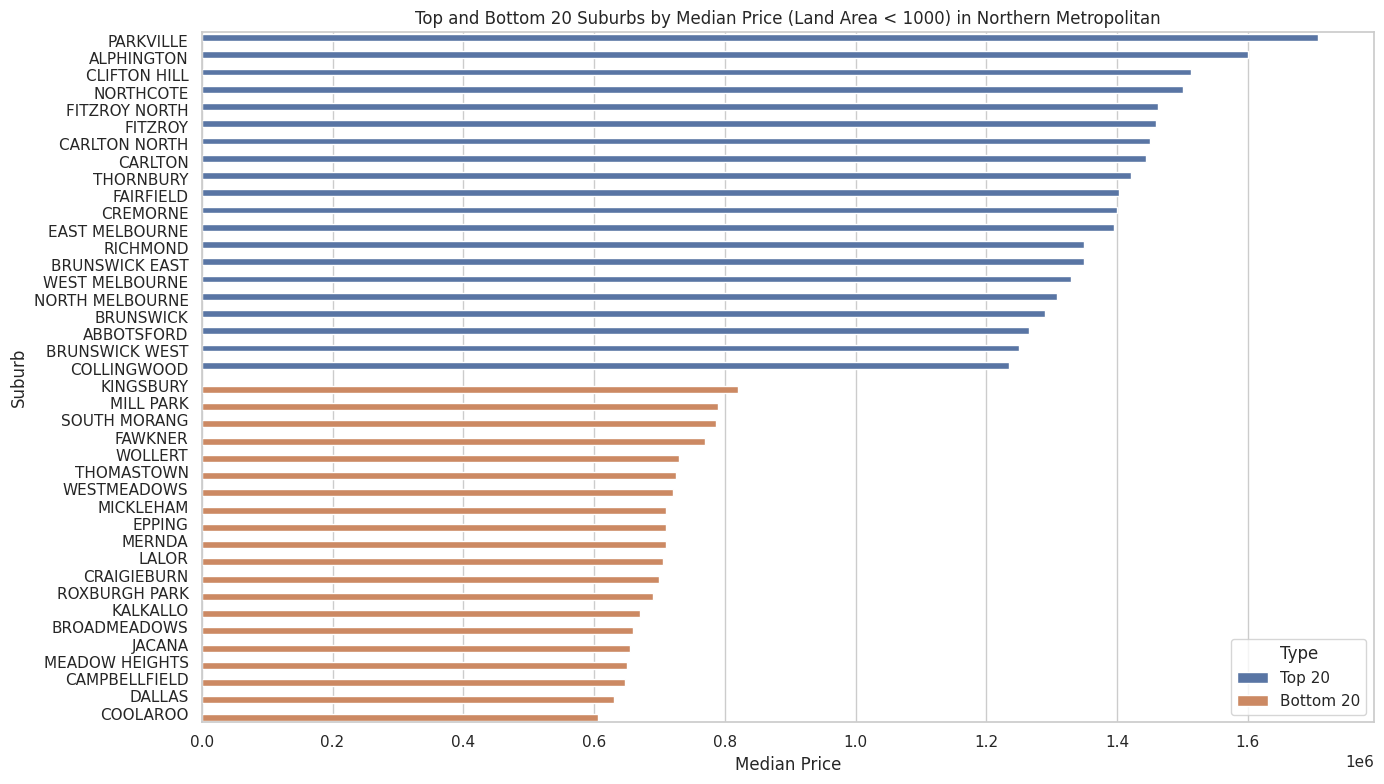

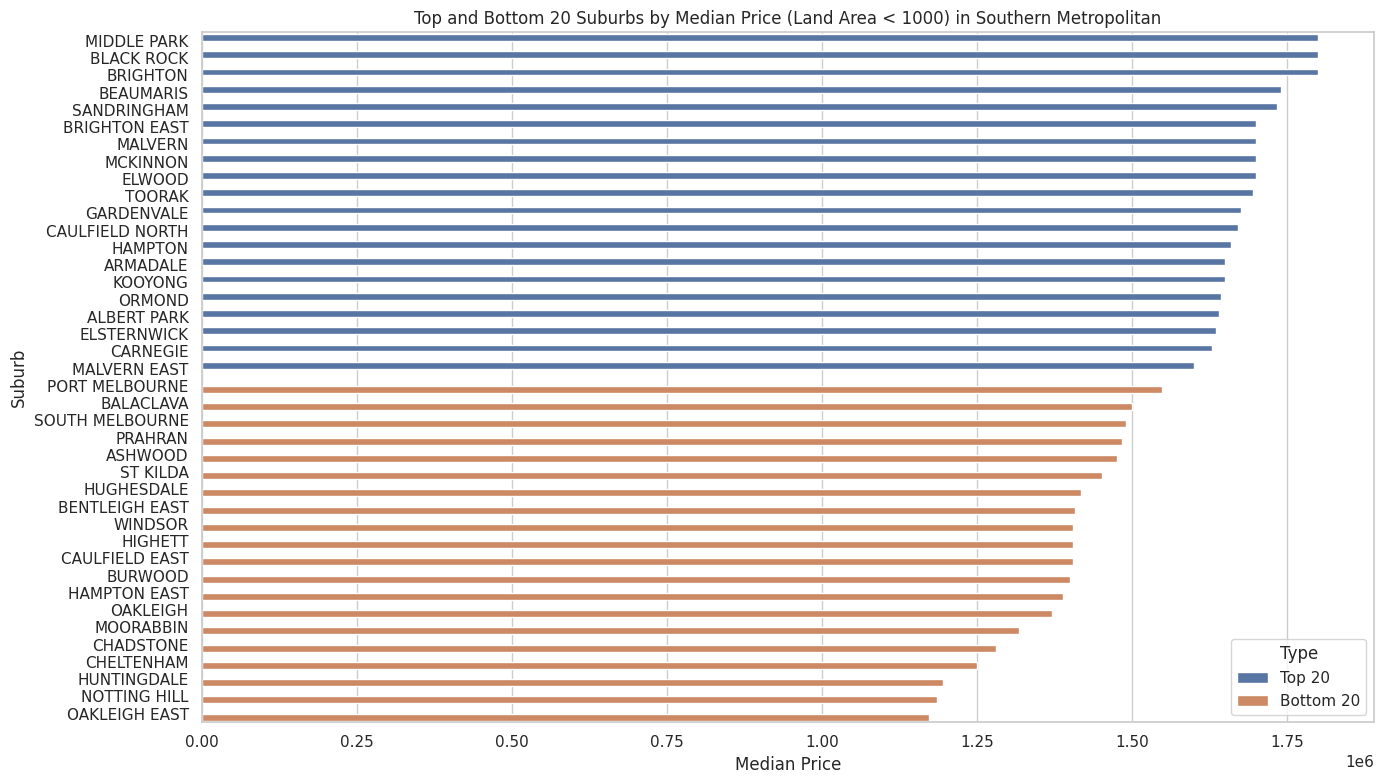

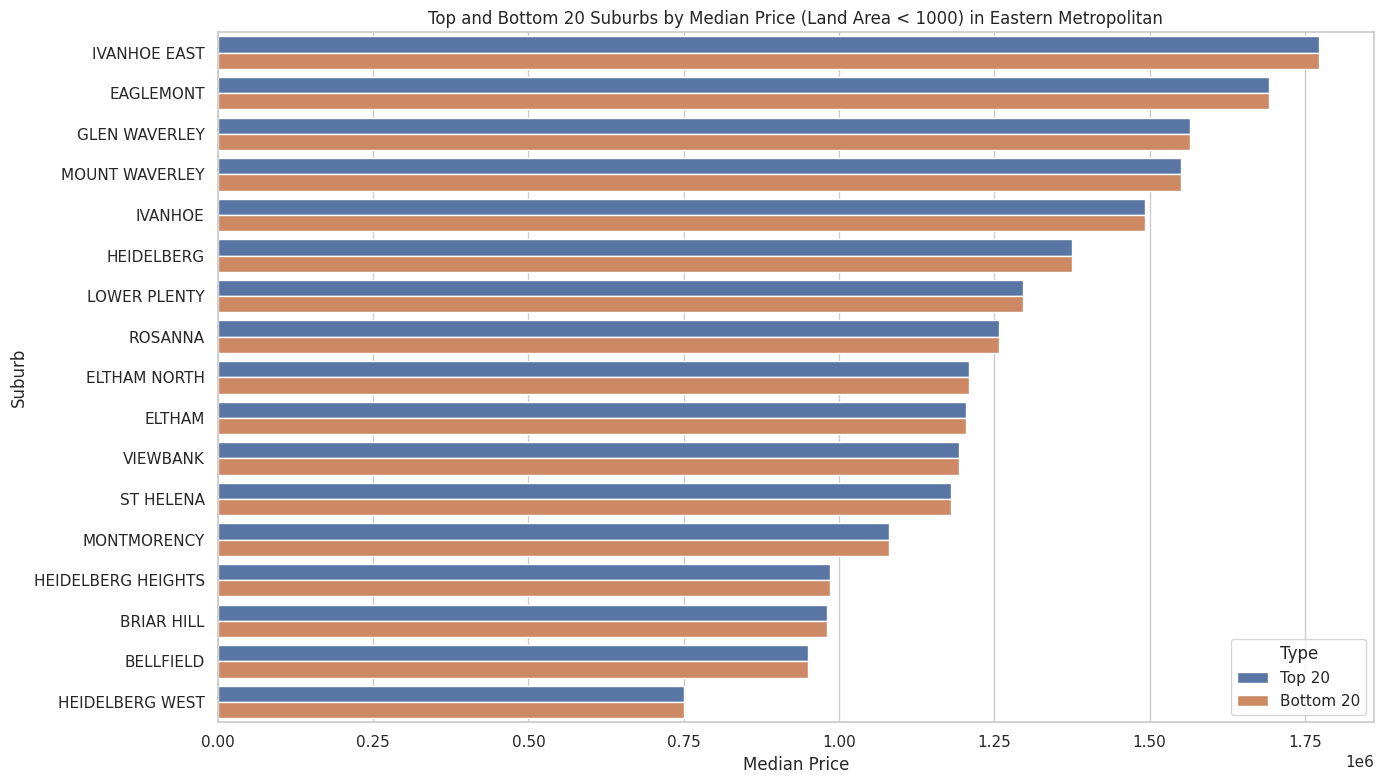

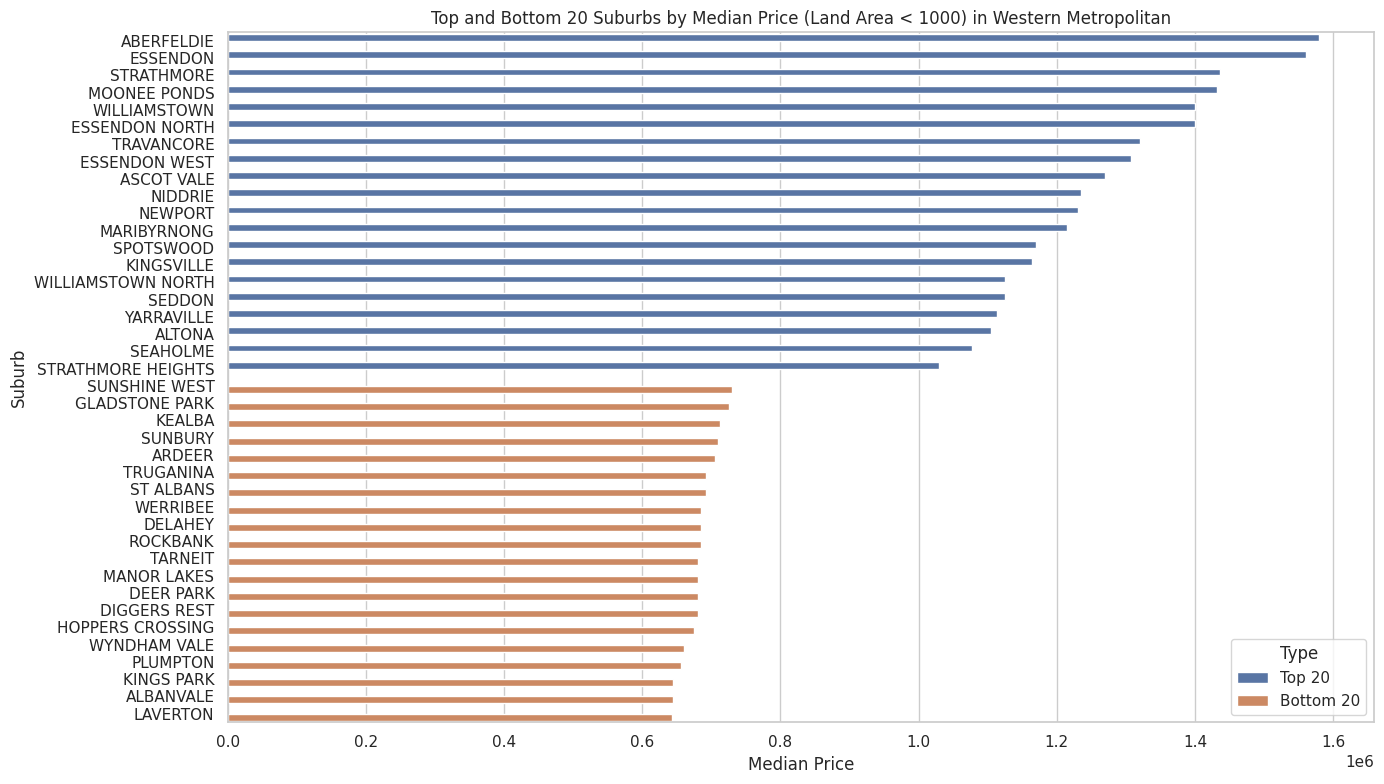

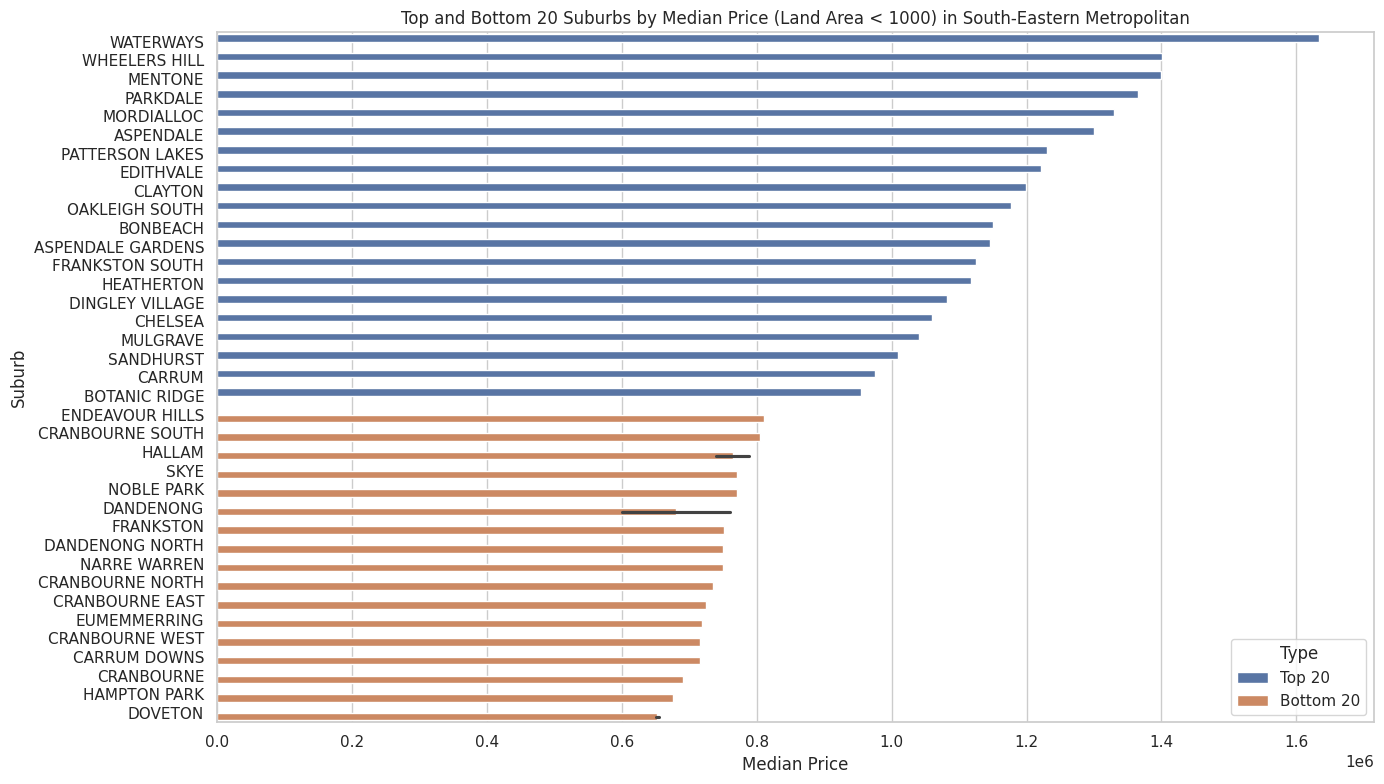

In [ ]:
# @title Default title text
# Set the style for the plots
sns.set(style="whitegrid")

# Loop through each region and plot the data
for region in regions:
    if region in results_by_region_with_property_type_a:
        # Extract the data for the region
        top_20_data = results_by_region_with_property_type_a[region]['Top 20 Suburbs'].copy()
        bottom_20_data = results_by_region_with_property_type_a[region]['Bottom 20 Suburbs'].copy()

        # Combine top and bottom 20 data
        top_20_data.loc[:, 'Type'] = 'Top 20'
        bottom_20_data.loc[:, 'Type'] = 'Bottom 20'
        combined_data = pd.concat([top_20_data, bottom_20_data])

        # Reset index for easier plotting
        combined_data.reset_index(inplace=True)

        # Plot the data
        plt.figure(figsize=(14, 8))

        # Barplot for top 20 and bottom 20 suburbs
        sns.barplot(x='Price', y='Suburb', hue='Type', data=combined_data, dodge=True)

        # Customize the plot
        plt.title(f'Top and Bottom 20 Suburbs by Median Price (Land Area < 1000) in {region}')
        plt.xlabel('Median Price')
        plt.ylabel('Suburb')
        plt.legend(title='Type')
        plt.tight_layout()

        # Show the plot
        plt.show()
    else:
        print(f"No data available for region: {region}")

- Now, we are seeing how the price changes in terms of different property types.
- Chelsea, located in the bayside area, has shown an attractive price trend over the past two years. With prices in the neighboring suburb like Aspendale capped at 1.2-1.3 million, Chelsea presents a promising long-term investment opportunity.

Resampled data:
           Suburb Date Listed      Price
0  BOTANIC RIDGE  2022-01-31 926,500.00
1  BOTANIC RIDGE  2022-07-31 990,000.00
2  BOTANIC RIDGE  2023-01-31 925,000.00
3  BOTANIC RIDGE  2023-07-31 920,000.00
4  BOTANIC RIDGE  2024-01-31 889,000.00


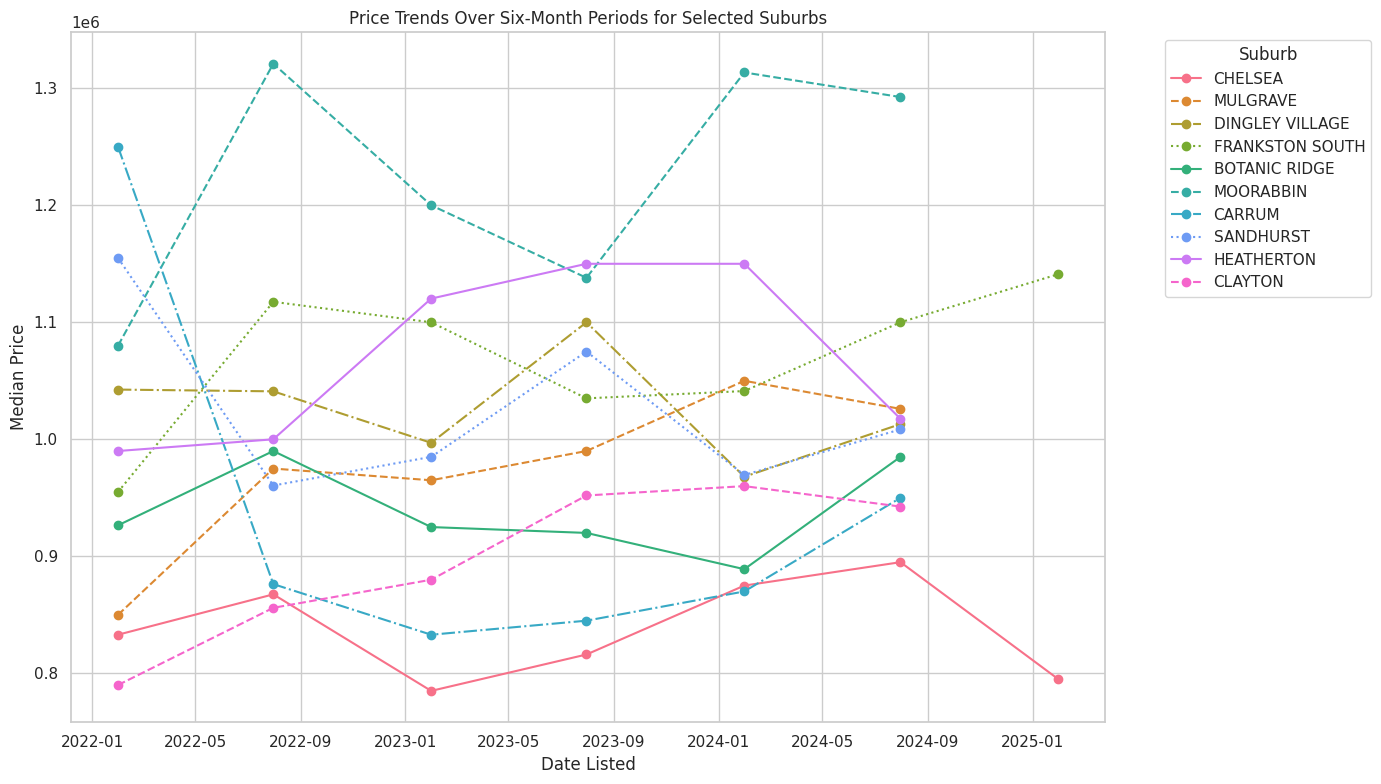

In [ ]:
# @title Suburb pick prices changes
# Convert 'Date Listed' to datetime format if not already done
df['Date Listed'] = pd.to_datetime(df['Date Listed'])

# Check for NaNs in key columns and drop them
df = df.dropna(subset=['Suburb', 'Date Listed', 'Price'])

# Filter the data for the selected suburbs
filtered_suburbs_df = df[df['Suburb'].isin(selected_suburbs)]

# Set 'Date Listed' as the index for resampling
filtered_suburbs_df.set_index('Date Listed', inplace=True)

# Resample the data to get the median price for each suburb and date
six_monthly_median_prices = filtered_suburbs_df.groupby('Suburb').resample('6M')['Price'].median().reset_index()

# Verify the resampled data
print("Resampled data:\n", six_monthly_median_prices.head())

# Plot
plt.figure(figsize=(14, 8))

# Use a color palette with different styles for each suburb
palette = sns.color_palette("husl", len(selected_suburbs))

# Define a list of line styles
styles = ['-', '--', '-.', ':'] * (len(selected_suburbs) // 4 + 1)
styles = styles[:len(selected_suburbs)]

for suburb, style in zip(selected_suburbs, styles):
    suburb_data = six_monthly_median_prices[six_monthly_median_prices['Suburb'] == suburb]
    plt.plot(suburb_data['Date Listed'], suburb_data['Price'],
             marker='o', linestyle=style, color=palette[selected_suburbs.index(suburb)],
             label=suburb)

# Customize the plot
plt.title('Price Trends Over Six-Month Periods for Selected Suburbs')
plt.xlabel('Date Listed')
plt.ylabel('Median Price')
plt.legend(title='Suburb', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# @title Default title text
# Convert 'Date Listed' to datetime format if not already done
df['Date Listed'] = pd.to_datetime(df['Date Listed'])

# Check for NaNs in key columns and drop them
df = df.dropna(subset=['Suburb', 'Date Listed', 'Price'])

# Filter the data for the selected suburbs and property types
filtered_suburbs_df = df[df['Suburb'].isin(selected_suburbs) & df['Property Type'].isin(property_house_size)]

# Set 'Date Listed' as the index for resampling
filtered_suburbs_df.set_index('Date Listed', inplace=True)

# Resample the data to get the median price for each suburb and date
six_monthly_median_prices = filtered_suburbs_df.groupby('Suburb').resample('6M')['Price'].median().reset_index()

# Verify the resampled data
print("Resampled data:\n", six_monthly_median_prices.head())

# Create a Plotly figure
fig = go.Figure()

# Set a color palette
palette = sns.color_palette("husl", len(selected_suburbs))

# Define a list of line styles (adjusted for Plotly)
styles = ['solid', 'dash', 'dot', 'dashdot'] * (len(selected_suburbs) // 4 + 1)
styles = styles[:len(selected_suburbs)]  # Truncate to the required length

# Add a trace for each suburb
for suburb, style in zip(selected_suburbs, styles):
    suburb_data = six_monthly_median_prices[six_monthly_median_prices['Suburb'] == suburb]
    fig.add_trace(go.Scatter(
        x=suburb_data['Date Listed'],
        y=suburb_data['Price'],
        mode='lines+markers',
        name=suburb,
        line=dict(dash=style),
        marker=dict(size=8),
        text=suburb_data.apply(lambda row: f"Suburb: {row['Suburb']}<br>Average Price: ${row['Price']:.2f}", axis=1),
        hoverinfo='text'
    ))

# Customize the layout
fig.update_layout(
    title='Price Trends Over Six-Month Periods for Selected Suburbs',
    xaxis_title='Date Listed',
    yaxis_title='Median Price',
    legend_title='Suburb',
    hovermode='closest',
    margin=dict(l=40, r=40, t=40, b=40),
    paper_bgcolor='rgb(255, 255, 255)',
    plot_bgcolor='rgb(240, 240, 240)',
)

# Show the plot
fig.show()

# Save the plot as an HTML file
fig.write_html("six_monthly_price_trends.html")

Resampled data:
           Suburb Date Listed      Price
0  BOTANIC RIDGE  2022-01-31 926,500.00
1  BOTANIC RIDGE  2022-07-31 990,000.00
2  BOTANIC RIDGE  2023-01-31 925,000.00
3  BOTANIC RIDGE  2023-07-31 922,500.00
4  BOTANIC RIDGE  2024-01-31 912,500.00


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/

In [ ]:
# @title Default title text
total_sales = df['Price'].sum()

In [ ]:
# @title Sales by month
def month_sales(df, month, sales=total_sales):
    share_month_sales = df['Price'].loc[df['Month Sold'] == month].sum()/sales
    return share_month_sales

january_sales = month_sales(df, 1)
february_sales = month_sales(df, 2)
march_sales = month_sales(df, 3)
april_sales = month_sales(df, 4)
may_sales = month_sales(df, 5)
june_sales = month_sales(df, 6)
july_sales = month_sales(df, 7)
august_sales = month_sales(df, 8)
september_sales = month_sales(df, 9)
october_sales = month_sales(df, 10)
november_sales = month_sales(df, 11)
december_sales = month_sales(df, 12)

month_total_sales = [january_sales, february_sales, march_sales, april_sales,
                     may_sales, june_sales, july_sales, august_sales,
                     september_sales, october_sales, november_sales, december_sales]

labels = ['January', 'February', 'March', 'April',
          'May', 'June', 'July', 'August', 'September',
          'October', 'November', 'December']


colors = ['#ffb4da', '#b4b4ff', '#daffb4', '#fbab60', '#fa8072', '#FA6006',
          '#FDB603', '#639702', '#dacde6', '#faec72', '#9ab973', '#87cefa']

pie_plot = go.Pie(labels=labels, values=month_total_sales,
               hoverinfo='label+percent',
               marker=dict(colors=colors,
                           line=dict(color='#000000', width=2)))

data = [pie_plot]

layout = go.Layout(
    title="Share of Sales by Month"
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='lowest-oecd-votes-cast')

# Save the plot as an HTML file
fig.write_html("sales_by_month_pie_chart.html")

- In conclusion, there are more sales in first half of the year.
- House prices trends is not moving upwards in recent time so it would be good time to buy a property.
- South-Easter suburbs like Chelsea or Frankston South are good investment if we can find houses around 1-1.1 mil.